In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from matplotlib.ticker import AutoMinorLocator
import matplotlib.patches as patches
%config InlineBackend.figure_format = 'retina'

In [2]:
modelname = 'mild-salad-468'
modelname = 'morning-bush-469'
# modelname = 'dutiful-gorge-467'
modelname = 'robust-tree-339'
modelname='fluent-dawn-488'
modelname='dry-galaxy-489'
modelname='skilled-night-490'
modelname='hopeful-smoke-499'
fpath = f'/raid/javier/Datasets/CaloVAE/data/synData/dataset2_synthetic_{modelname}.hdf5' #/fast_scratch/QVAE/data/atlas_dataset2and3_uniform/dataset_2_synthetic.hdf5" #"/fast_scratch/QVAE/syn_data/dataset2_synthetic_nohits.hdf5" #"/fast_scratch/QVAE/syn_data/dataset2_synthetic.hdf5"
in_data=h5py.File(fpath,'r')

atlas_fpath = "/raid/javier/Datasets/CaloVAE/data/atlas_dataset2and3/dataset_2_2.hdf5"  #"/fast_scratch/QVAE/data/atlas_dataset2and3_uniform/dataset_2_1.hdf5"  
atlas_=h5py.File(atlas_fpath,'r')

# test_fpath = "/fast_scratch/QVAE/test_data/dataset_2_2.hdf5"
# test_data=h5py.File(atlas_fpath,'r')

In [3]:
atlas_energies = np.array(atlas_["incident_energies"])/1000
data_energies = np.array(in_data['incidence energy'])/1000 #loaded['energy']/1000 

In [4]:
atlas_data = np.array(atlas_["showers"]) #[((low_cutoff < atlas_energies) & (atlas_energies < high_cutoff)).squeeze()]
data = np.array(in_data['showers'])

In [5]:
in_data.keys()

<KeysViewHDF5 ['incidence energy', 'showers']>

In [6]:
data = (data).mean(axis=0)
atlas_data = (atlas_data).mean(axis=0)

data = np.reshape(data, (45,16,9))
atlas_data = np.reshape(atlas_data, (45,16,9))

In [7]:
r_avg_data = data.sum(axis=0).sum(axis=0) /1000
r_avg_atlas_data = atlas_data.sum(axis=0).sum(axis=0) /1000

theta_avg_data = data.sum(axis=0).sum(axis=1) /1000
theta_avg_atlas_data = atlas_data.sum(axis=0).sum(axis=1) /1000

layer_avg_data = data.sum(axis=1).sum(axis=1) /1000
layer_avg_atlas_data = atlas_data.sum(axis=1).sum(axis=1) /1000

In [8]:
modelname

'hopeful-smoke-499'

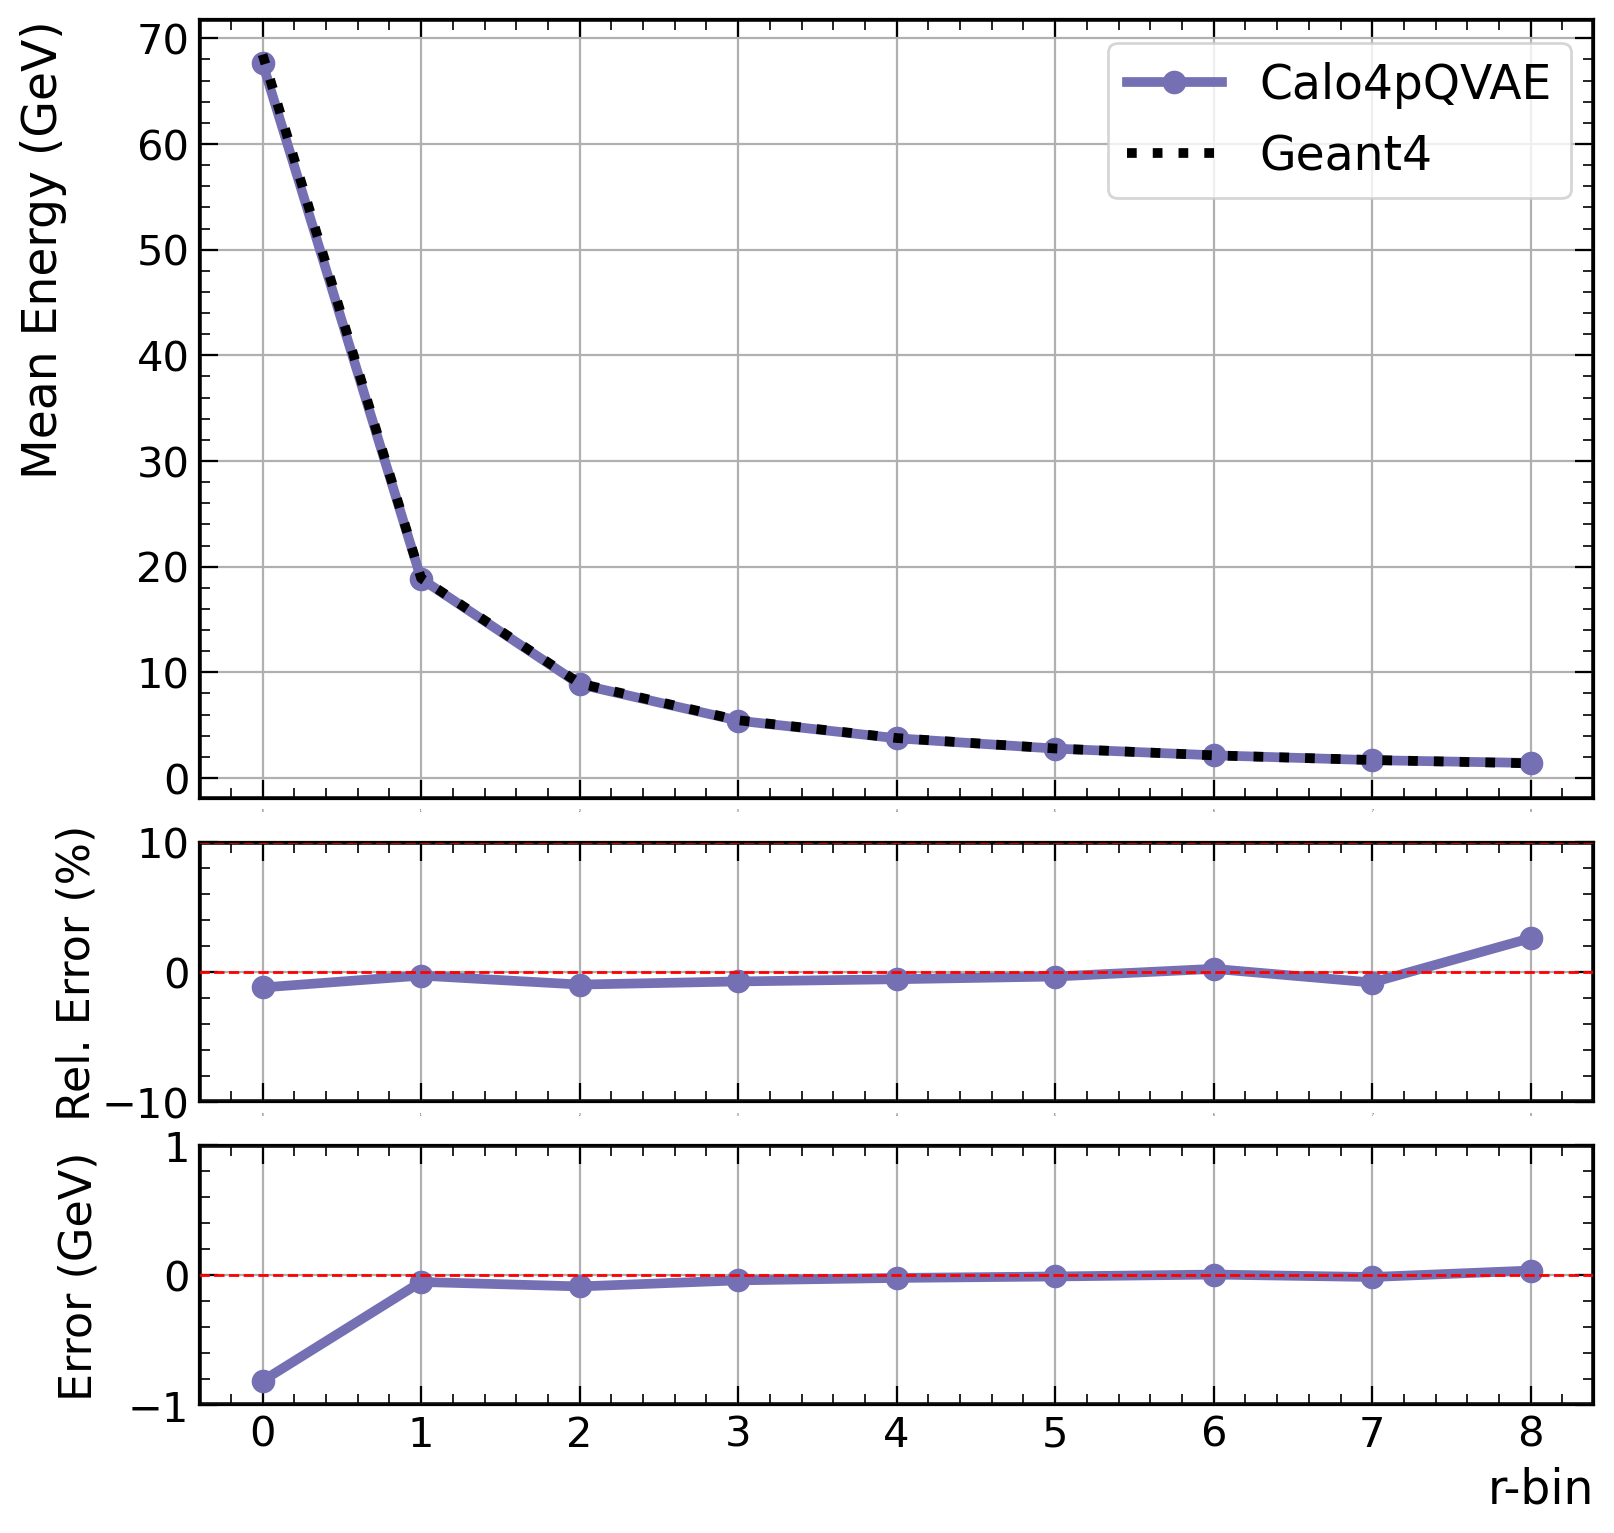

In [9]:
fig = plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(3, 1, height_ratios=[3,1,1]) 
gs.update(wspace=0.025, hspace=0.1)

ax0 = plt.subplot(gs[0])
plt.xticks(fontsize=0)
plt.yticks(fontsize=15)
ax1 = plt.subplot(gs[1],sharex=ax0)
plt.xticks(fontsize=0)
plt.yticks(fontsize=15)
ax2 = plt.subplot(gs[2],sharex=ax0)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plot_label = 'Calo4pQVAE'
atlas_label = 'Geant4'

ax0.plot(r_avg_data,label=plot_label,linestyle='-',color='#7570b3', lw=3.5, marker='.', markersize=15)
ax0.plot(r_avg_atlas_data,label=atlas_label,linestyle='dotted',color='black', lw=3.5)
ax0.grid("True")

ratio = 100*np.divide(r_avg_data-r_avg_atlas_data,r_avg_atlas_data)
ax1.plot(ratio,color='#7570b3',linewidth=3.5,linestyle='-', marker='.', markersize=15)
ax2.plot(r_avg_data-r_avg_atlas_data,color='#7570b3',linewidth=3.5,linestyle='-', marker='.', markersize=15)

ax0.set_xlabel("",fontsize=20)
ax0.set_ylabel("Mean Energy (GeV)", fontsize=17, loc="top", labelpad=25)

ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.yaxis.set_minor_locator(AutoMinorLocator())

ax0.tick_params(which='both', direction="in")
ax0.tick_params(which='major', length=7, direction="in")
ax0.tick_params(which='minor', length=4, direction="in")

ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.tick_params(axis="x",direction="in")
ax0.tick_params(axis="y",direction="in")

# Get the axis limits
x_min, x_max = ax0.get_xlim()
y_min, y_max = ax0.get_ylim()

# Create a rectangle patch for the outer line
outer_rectangle = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='none')
ax0.add_patch(outer_rectangle)

ax0.legend(loc='best',fontsize=17,ncol=1)

ax1.set_ylabel('Rel. Error (%)', fontsize=16, labelpad=1)
plt.xlabel("r-bin", fontsize=17, loc='right')
ax1.axhline(y=0.0, color='r', linestyle='--',linewidth=1)
ax1.axhline(y=10, color='r', linestyle='--',linewidth=1)
ax1.axhline(y=-10, color='r', linestyle='--',linewidth=1)
ax1.set_ylim([-10,10])
plt.rc("font", size=13)
ax1.grid("True")

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

ax1.tick_params(which='both', direction="in")
ax1.tick_params(which='major', length=7, direction="in")
ax1.tick_params(which='minor', length=4, direction="in")

ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.tick_params(axis="x",direction="in")
ax1.tick_params(axis="y",direction="in")

# Get the axis limits
x_min, x_max = ax1.get_xlim()
y_min, y_max = ax1.get_ylim()

# Create a rectangle patch for the outer line
outer_rectangle = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='none')
ax1.add_patch(outer_rectangle)

# Axis 2

ax2.set_ylabel('Error (GeV)', fontsize=16, labelpad=10)
ax2.axhline(y=0.0, color='r', linestyle='--',linewidth=1)
ax2.set_ylim([-1,1])
# ax2.set_xlim(xmin=-0.1)
ax2.grid("True")

ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

ax2.tick_params(which='both', direction="in")
ax2.tick_params(which='major', length=7, direction="in")
ax2.tick_params(which='minor', length=4, direction="in")

ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis="x",direction="in")
ax2.tick_params(axis="y",direction="in")

# Get the axis limits
x_min, x_max = ax2.get_xlim()
y_min, y_max = ax2.get_ylim()

# Create a rectangle patch for the outer line
outer_rectangle = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='none')
ax2.add_patch(outer_rectangle)

plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/{modelname}/meanEnergyVsR_{modelname}.png')

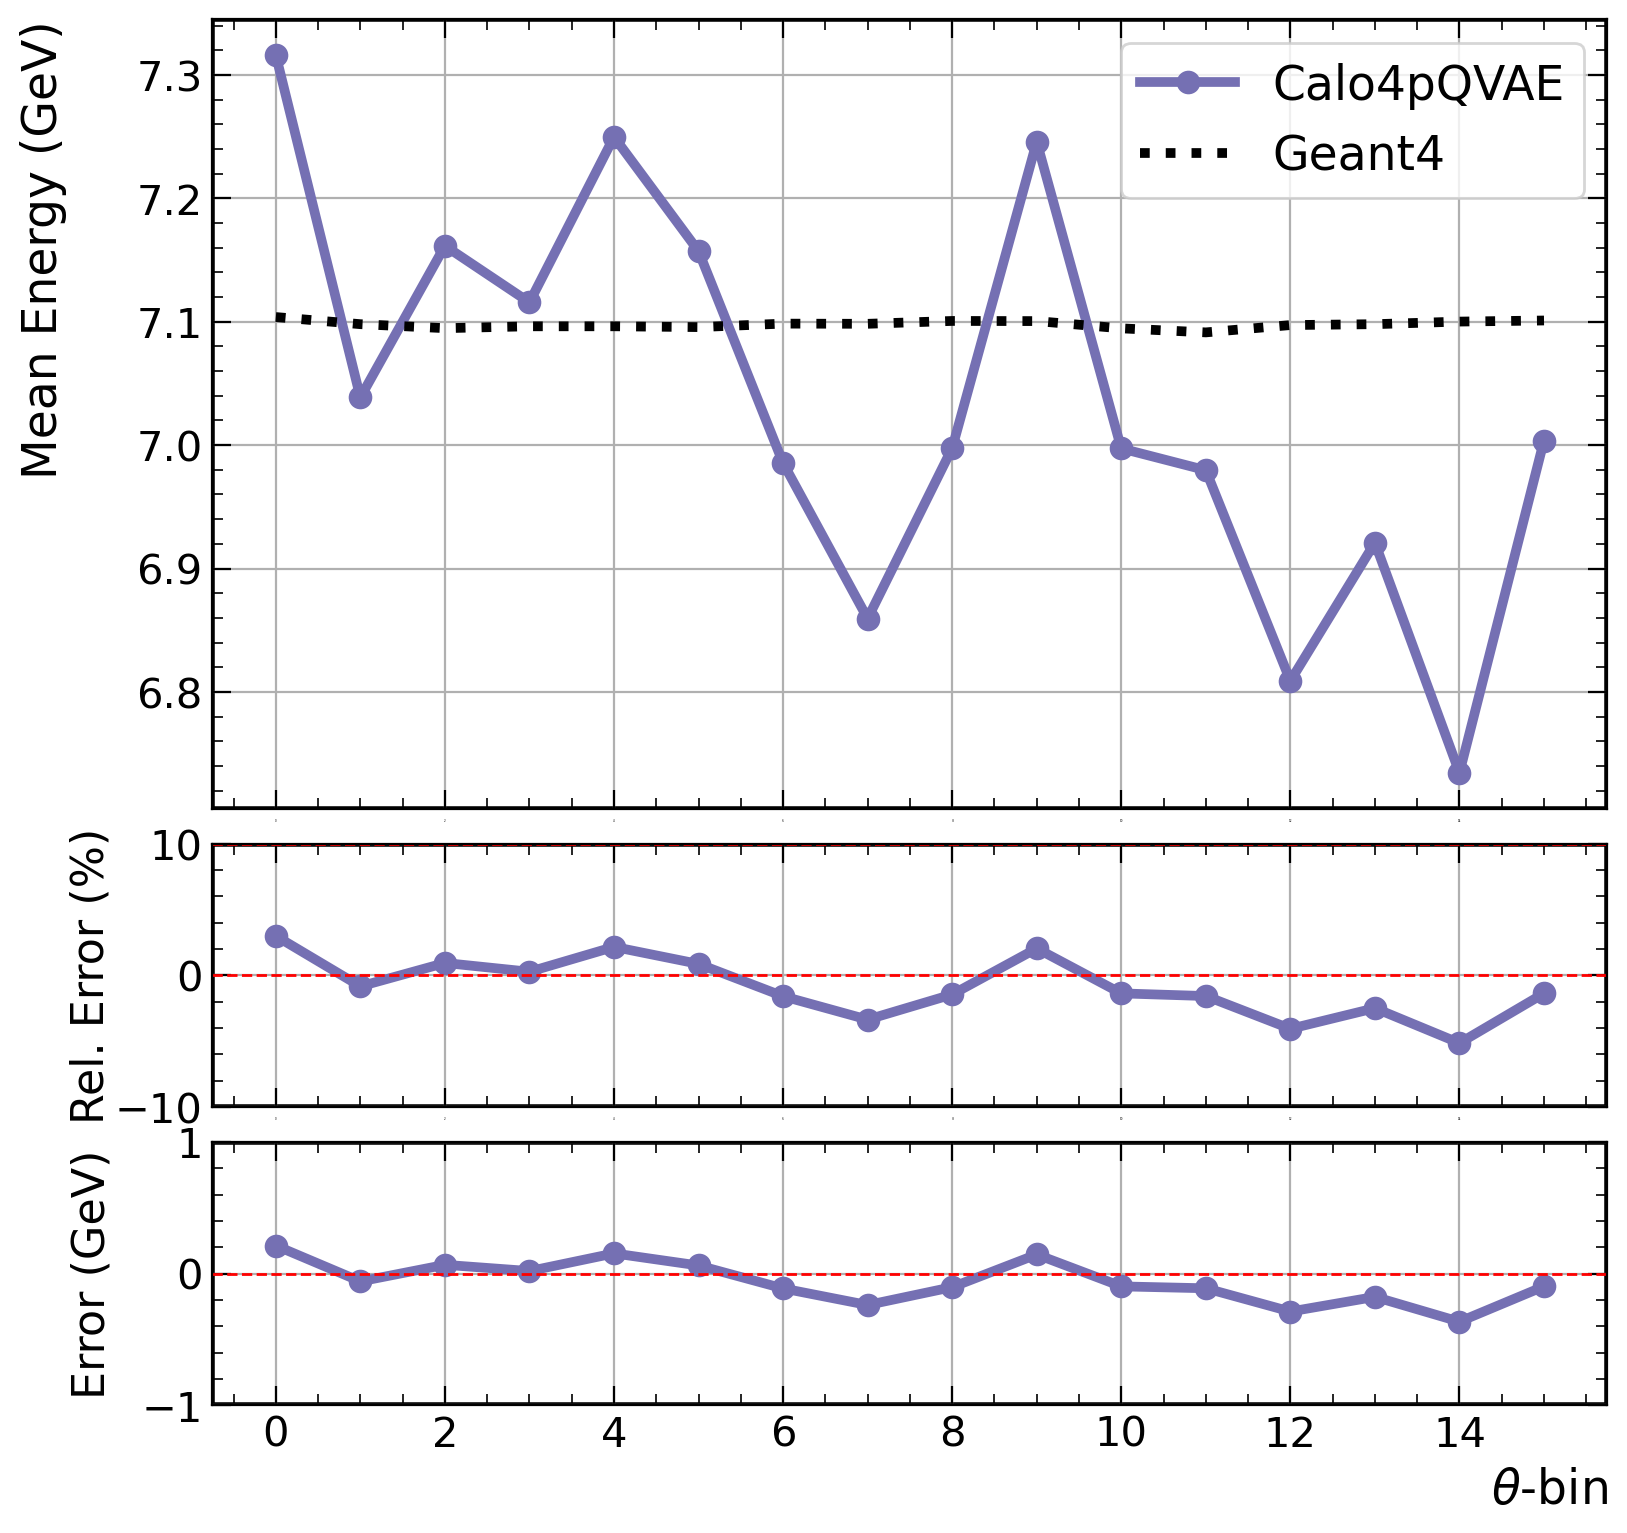

In [10]:
fig = plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(3, 1, height_ratios=[3,1,1]) 
gs.update(wspace=0.025, hspace=0.08)

ax0 = plt.subplot(gs[0])
plt.xticks(fontsize=0)
plt.yticks(fontsize=15)
ax1 = plt.subplot(gs[1],sharex=ax0)
plt.xticks(fontsize=0)
plt.yticks(fontsize=15)
ax2 = plt.subplot(gs[2],sharex=ax0)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plot_label = 'Calo4pQVAE'
atlas_label = 'Geant4'

ax0.plot(theta_avg_data,label=plot_label,linestyle='-',color='#7570b3',lw=3.5, marker='.', markersize=15)
ax0.plot(theta_avg_atlas_data,label=atlas_label,linestyle='dotted',color='black',lw=3.5)
ax0.grid("True")

ratio = 100*np.divide(theta_avg_data-theta_avg_atlas_data,theta_avg_atlas_data)
ax1.plot(ratio,color='#7570b3',linewidth=3.5,linestyle='-', marker='.', markersize=15)
ax1.grid("True")
ax2.plot(theta_avg_data-theta_avg_atlas_data,color='#7570b3',linewidth=3.5,linestyle='-', marker='.', markersize=15)
ax2.grid("True")

ax0.set_xlabel("",fontsize=20)
ax0.set_ylabel("Mean Energy (GeV)", fontsize=17, loc="top", labelpad=25)

ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.yaxis.set_minor_locator(AutoMinorLocator())

ax0.tick_params(which='both', direction="in")
ax0.tick_params(which='major', length=7, direction="in")
ax0.tick_params(which='minor', length=4, direction="in")

ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.tick_params(axis="x",direction="in")
ax0.tick_params(axis="y",direction="in")

# Get the axis limits
x_min, x_max = ax0.get_xlim()
y_min, y_max = ax0.get_ylim()

# Create a rectangle patch for the outer line
outer_rectangle = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='none')
ax0.add_patch(outer_rectangle)

ax0.legend(loc='best',fontsize=17,ncol=1)

ax1.set_ylabel('Rel. Error (%)', fontsize=16, labelpad=1)
plt.xlabel(r'$\theta$-bin', fontsize=17, loc='right')
ax1.axhline(y=0.0, color='r', linestyle='--',linewidth=1)
ax1.axhline(y=10, color='r', linestyle='--',linewidth=1)
ax1.axhline(y=-10, color='r', linestyle='--',linewidth=1)
ax1.set_ylim([-10,10])
plt.rc("font", size=13)

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

ax1.tick_params(which='both', direction="in")
ax1.tick_params(which='major', length=7, direction="in")
ax1.tick_params(which='minor', length=4, direction="in")

ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.tick_params(axis="x",direction="in")
ax1.tick_params(axis="y",direction="in")

# Get the axis limits
x_min, x_max = ax1.get_xlim()
y_min, y_max = ax1.get_ylim()

# Create a rectangle patch for the outer line
outer_rectangle = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='none')
ax1.add_patch(outer_rectangle)

# Axis 2

ax2.set_ylabel('Error (GeV)', fontsize=16, labelpad=10.0)
ax2.axhline(y=0.0, color='r', linestyle='--',linewidth=1)
ax2.set_ylim([-1,1])

ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

ax2.tick_params(which='both', direction="in")
ax2.tick_params(which='major', length=7, direction="in")
ax2.tick_params(which='minor', length=4, direction="in")

ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis="x",direction="in")
ax2.tick_params(axis="y",direction="in")

# Get the axis limits
x_min, x_max = ax2.get_xlim()
y_min, y_max = ax2.get_ylim()

# Create a rectangle patch for the outer line
outer_rectangle = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='none')
ax2.add_patch(outer_rectangle)

plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/{modelname}/meanEnergyVstheta_{modelname}.png')

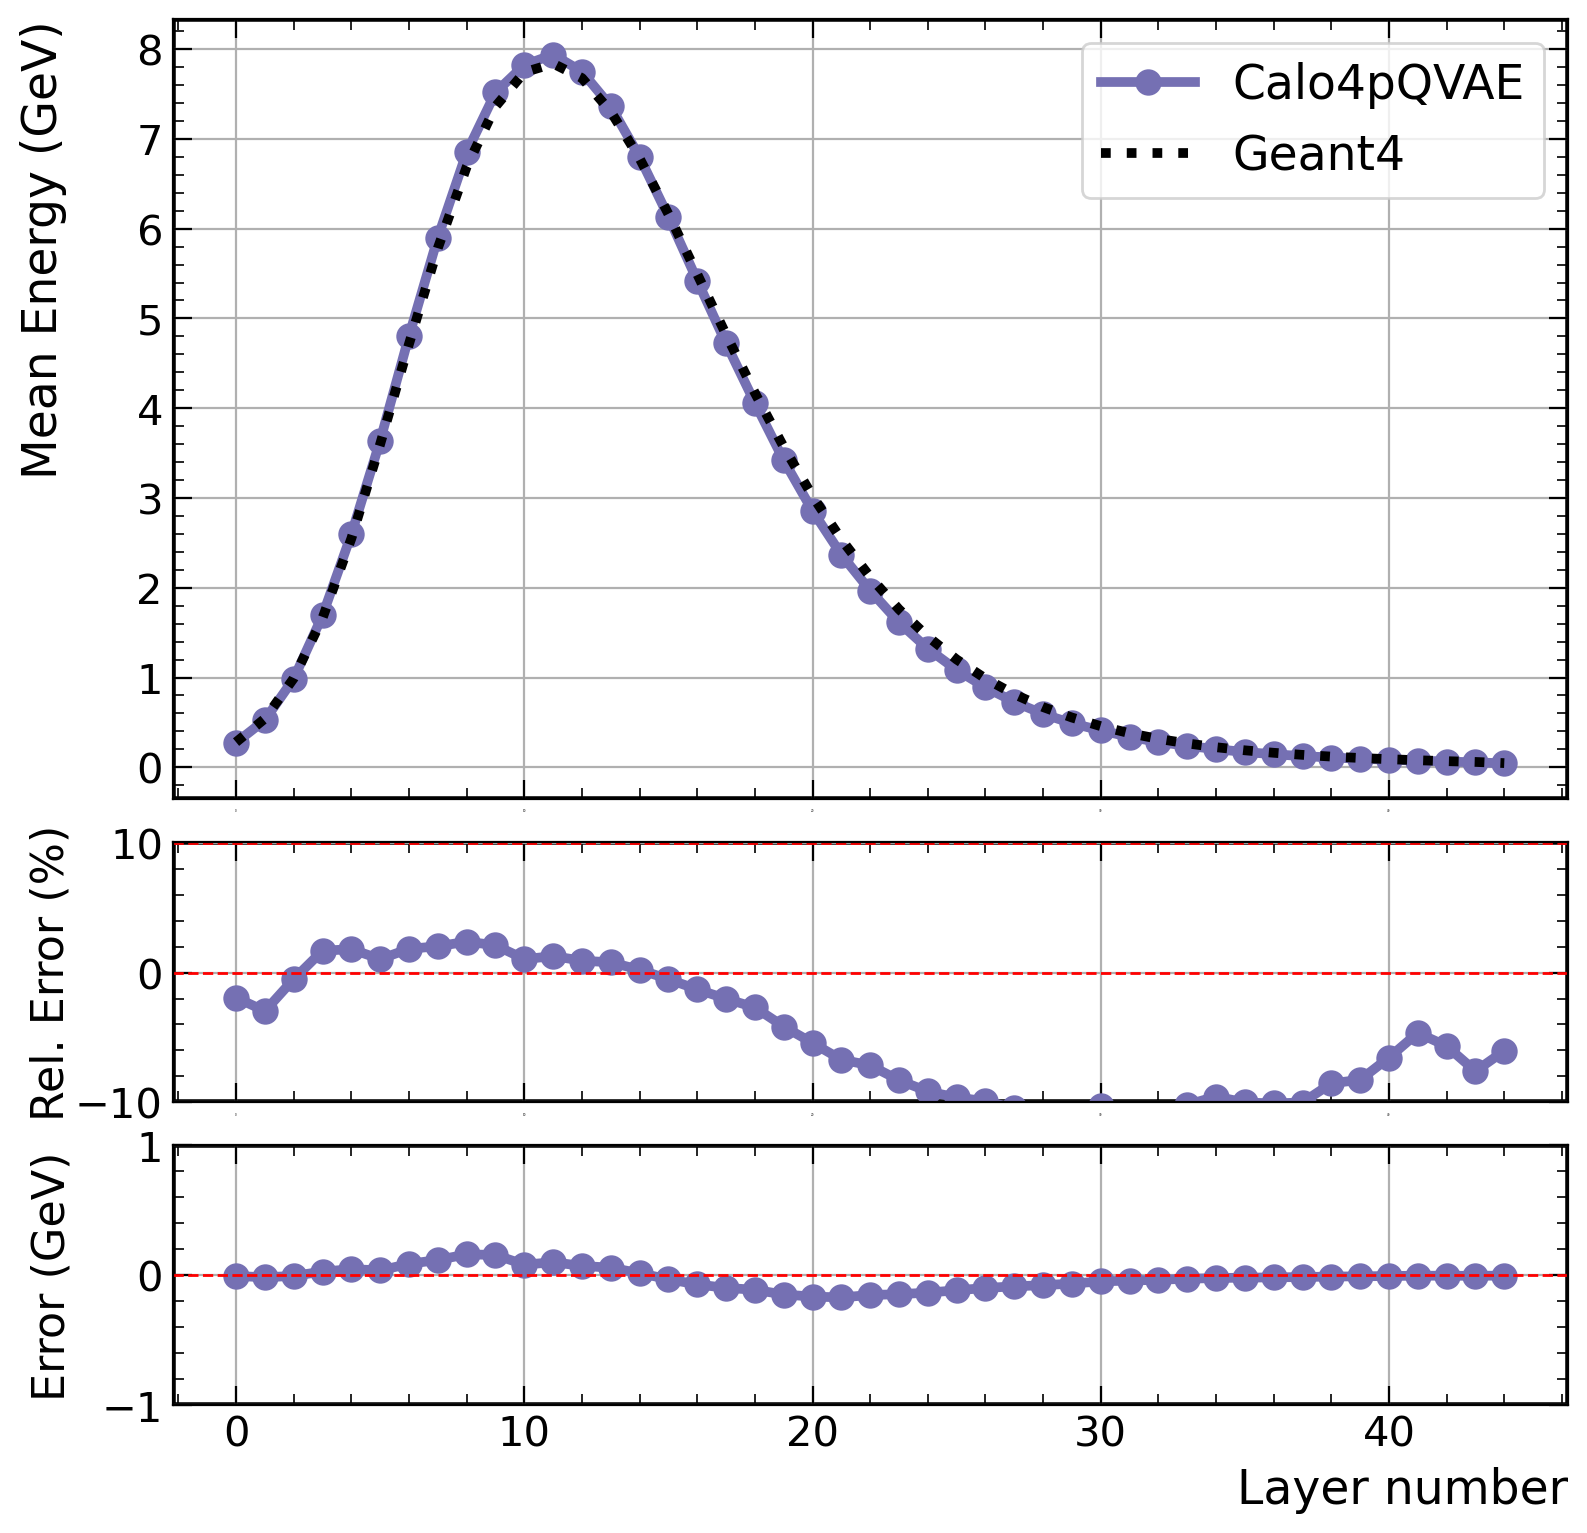

In [11]:
fig = plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(3, 1, height_ratios=[3,1,1]) 
gs.update(wspace=0.025, hspace=0.1)

ax0 = plt.subplot(gs[0])
plt.xticks(fontsize=0)
plt.yticks(fontsize=15)
ax1 = plt.subplot(gs[1],sharex=ax0)
plt.xticks(fontsize=0)
plt.yticks(fontsize=15)
ax2 = plt.subplot(gs[2],sharex=ax0)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plot_label = 'Calo4pQVAE'
atlas_label = 'Geant4'

ax0.plot(layer_avg_data,label=plot_label,linestyle='-',color='#7570b3', lw=3.5, marker='.', markersize=17)
ax0.plot(layer_avg_atlas_data,label=atlas_label,linestyle='dotted',color='black', lw=3.5)
ax0.grid("True")

ratio = 100*np.divide(layer_avg_data-layer_avg_atlas_data,layer_avg_atlas_data)
ax1.plot(ratio,color='#7570b3',linewidth=3.5,linestyle='-', marker='.', markersize=17)
ax1.grid("True")
ax2.plot(layer_avg_data-layer_avg_atlas_data,color='#7570b3',linewidth=3.5,linestyle='-', marker='.', markersize=17)
ax2.grid("True")

ax0.set_xlabel("",fontsize=20)
ax0.set_ylabel("Mean Energy (GeV)", fontsize=17, loc="top", labelpad=25)

ax0.xaxis.set_minor_locator(AutoMinorLocator())
ax0.yaxis.set_minor_locator(AutoMinorLocator())

ax0.tick_params(which='both', direction="in")
ax0.tick_params(which='major', length=7, direction="in")
ax0.tick_params(which='minor', length=4, direction="in")

ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.tick_params(axis="x",direction="in")
ax0.tick_params(axis="y",direction="in")

# Get the axis limits
x_min, x_max = ax0.get_xlim()
y_min, y_max = ax0.get_ylim()

# Create a rectangle patch for the outer line
outer_rectangle = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='none')
ax0.add_patch(outer_rectangle)

ax0.legend(loc='best',fontsize=17,ncol=1)

ax1.set_ylabel('Rel. Error (%)', fontsize=16, labelpad=1)
plt.xlabel("Layer number", fontsize=17, loc='right')
ax1.axhline(y=0.0, color='r', linestyle='--',linewidth=1)
ax1.axhline(y=10, color='r', linestyle='--',linewidth=1)
ax1.axhline(y=-10, color='r', linestyle='--',linewidth=1)
ax1.set_ylim([-10,10.1])
plt.rc("font", size=13)

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())

ax1.tick_params(which='both', direction="in")
ax1.tick_params(which='major', length=7, direction="in")
ax1.tick_params(which='minor', length=4, direction="in")

ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.tick_params(axis="x",direction="in")
ax1.tick_params(axis="y",direction="in")

# Get the axis limits
x_min, x_max = ax1.get_xlim()
y_min, y_max = ax1.get_ylim()

# Create a rectangle patch for the outer line
outer_rectangle = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='none')
ax1.add_patch(outer_rectangle)

# Axis 2

ax2.set_ylabel('Error (GeV)', fontsize=16, labelpad=10)
ax2.axhline(y=0.0, color='r', linestyle='--',linewidth=1)
ax2.set_ylim([-1,1])

ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())

ax2.tick_params(which='both', direction="in")
ax2.tick_params(which='major', length=7, direction="in")
ax2.tick_params(which='minor', length=4, direction="in")

ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax2.tick_params(axis="x",direction="in")
ax2.tick_params(axis="y",direction="in")

# Get the axis limits
x_min, x_max = ax2.get_xlim()
y_min, y_max = ax2.get_ylim()

# Create a rectangle patch for the outer line
outer_rectangle = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='black', facecolor='none')
ax2.add_patch(outer_rectangle)

plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/{modelname}/meanEnergyVsLayer_{modelname}.png')

In [75]:
###########
import torch

import hydra
from hydra.utils import instantiate
from hydra import initialize, compose

from utils.plotting.HighLevelFeatures import HighLevelFeatures as HLF



hydra.core.global_hydra.GlobalHydra.instance().clear()
initialize(version_base=None, config_path="../configs")


# config=compose(config_name="config.yaml")
config=compose(config_name="config.yaml")

HLF_1_photons = HLF('photon', filename=config.data.binning_xml_photons, wandb=False)
HLF_1_pions = HLF('pion', filename=config.data.binning_xml_pions, wandb=False)
HLF_1_electron = HLF('electron', filename=config.data.binning_xml_electrons, wandb=False)

/raid/javier/anaconda3/lib/python3.11/site-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'config.yaml': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)


In [76]:
atlas_energies = np.array(atlas_["incident_energies"])#/1000
data_energies = np.array(in_data['incidence energy'])#/1000 #loaded['energy']/1000 

entarget_samples = torch.tensor(atlas_energies)
entarget_samples_gen = torch.tensor(data_energies)

In [77]:
atlas_data = np.array(atlas_["showers"]) #[((low_cutoff < atlas_energies) & (atlas_energies < high_cutoff)).squeeze()]
data = np.array(in_data['showers'])

xtarget_samples = torch.tensor(atlas_data)
xgen_samples = torch.tensor(data)

In [78]:
xtarget_samples.shape

torch.Size([100000, 6480])

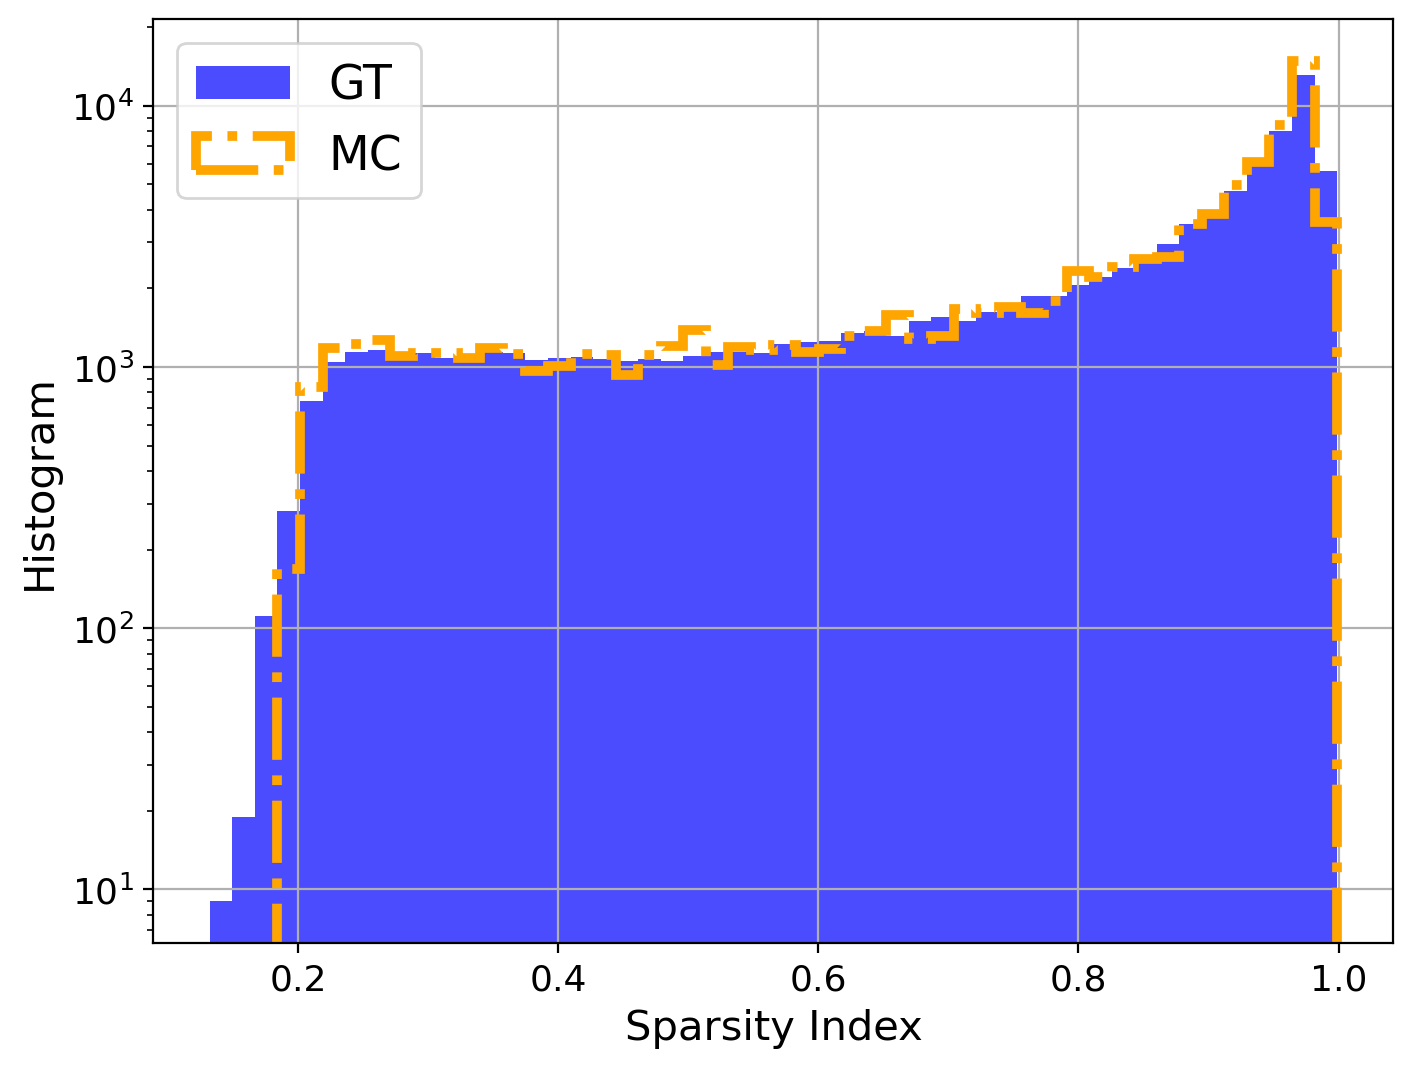

In [79]:
minVal, maxVal = min(((xtarget_samples == 0).sum(dim=1)/xtarget_samples.shape[1]).numpy()), max(((xtarget_samples == 0).sum(dim=1)/xtarget_samples.shape[1]).numpy())
binwidth = (maxVal-minVal)/50

plt.figure(figsize=(8,6))
plt.hist(((xtarget_samples == 0).sum(dim=1)/xtarget_samples.shape[1]).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='stepfilled', linewidth=2.5, color="b", alpha=0.7, label="GT")
# plt.hist(((xrecon_samples == 0).sum(dim=1)/xtarget_samples.shape[1]).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=2.5, color="c", label="Recon")
plt.hist(((xgen_samples == 0).sum(dim=1)/xtarget_samples.shape[1]).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=3.5, color="orange", linestyle="dashdot", label="MC")
# plt.hist(((xgen_samples_qpu == 0).sum(dim=1)/xtarget_samples.shape[1]).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=3.5, color="brown", linestyle="dashed", label="QPU")
plt.xlabel("Sparsity Index", fontsize=15)
plt.ylabel("Histogram", fontsize=15)
# plt.legend(["GT", "Recon", "Samples", "Sample /w QPU"], fontsize=17)
plt.legend( fontsize=17)
# plt.title(f'{ds[part]}')
plt.grid("True")
plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/{modelname}/sparsity_{modelname}_test.png')
plt.show()

<Figure size 800x600 with 0 Axes>

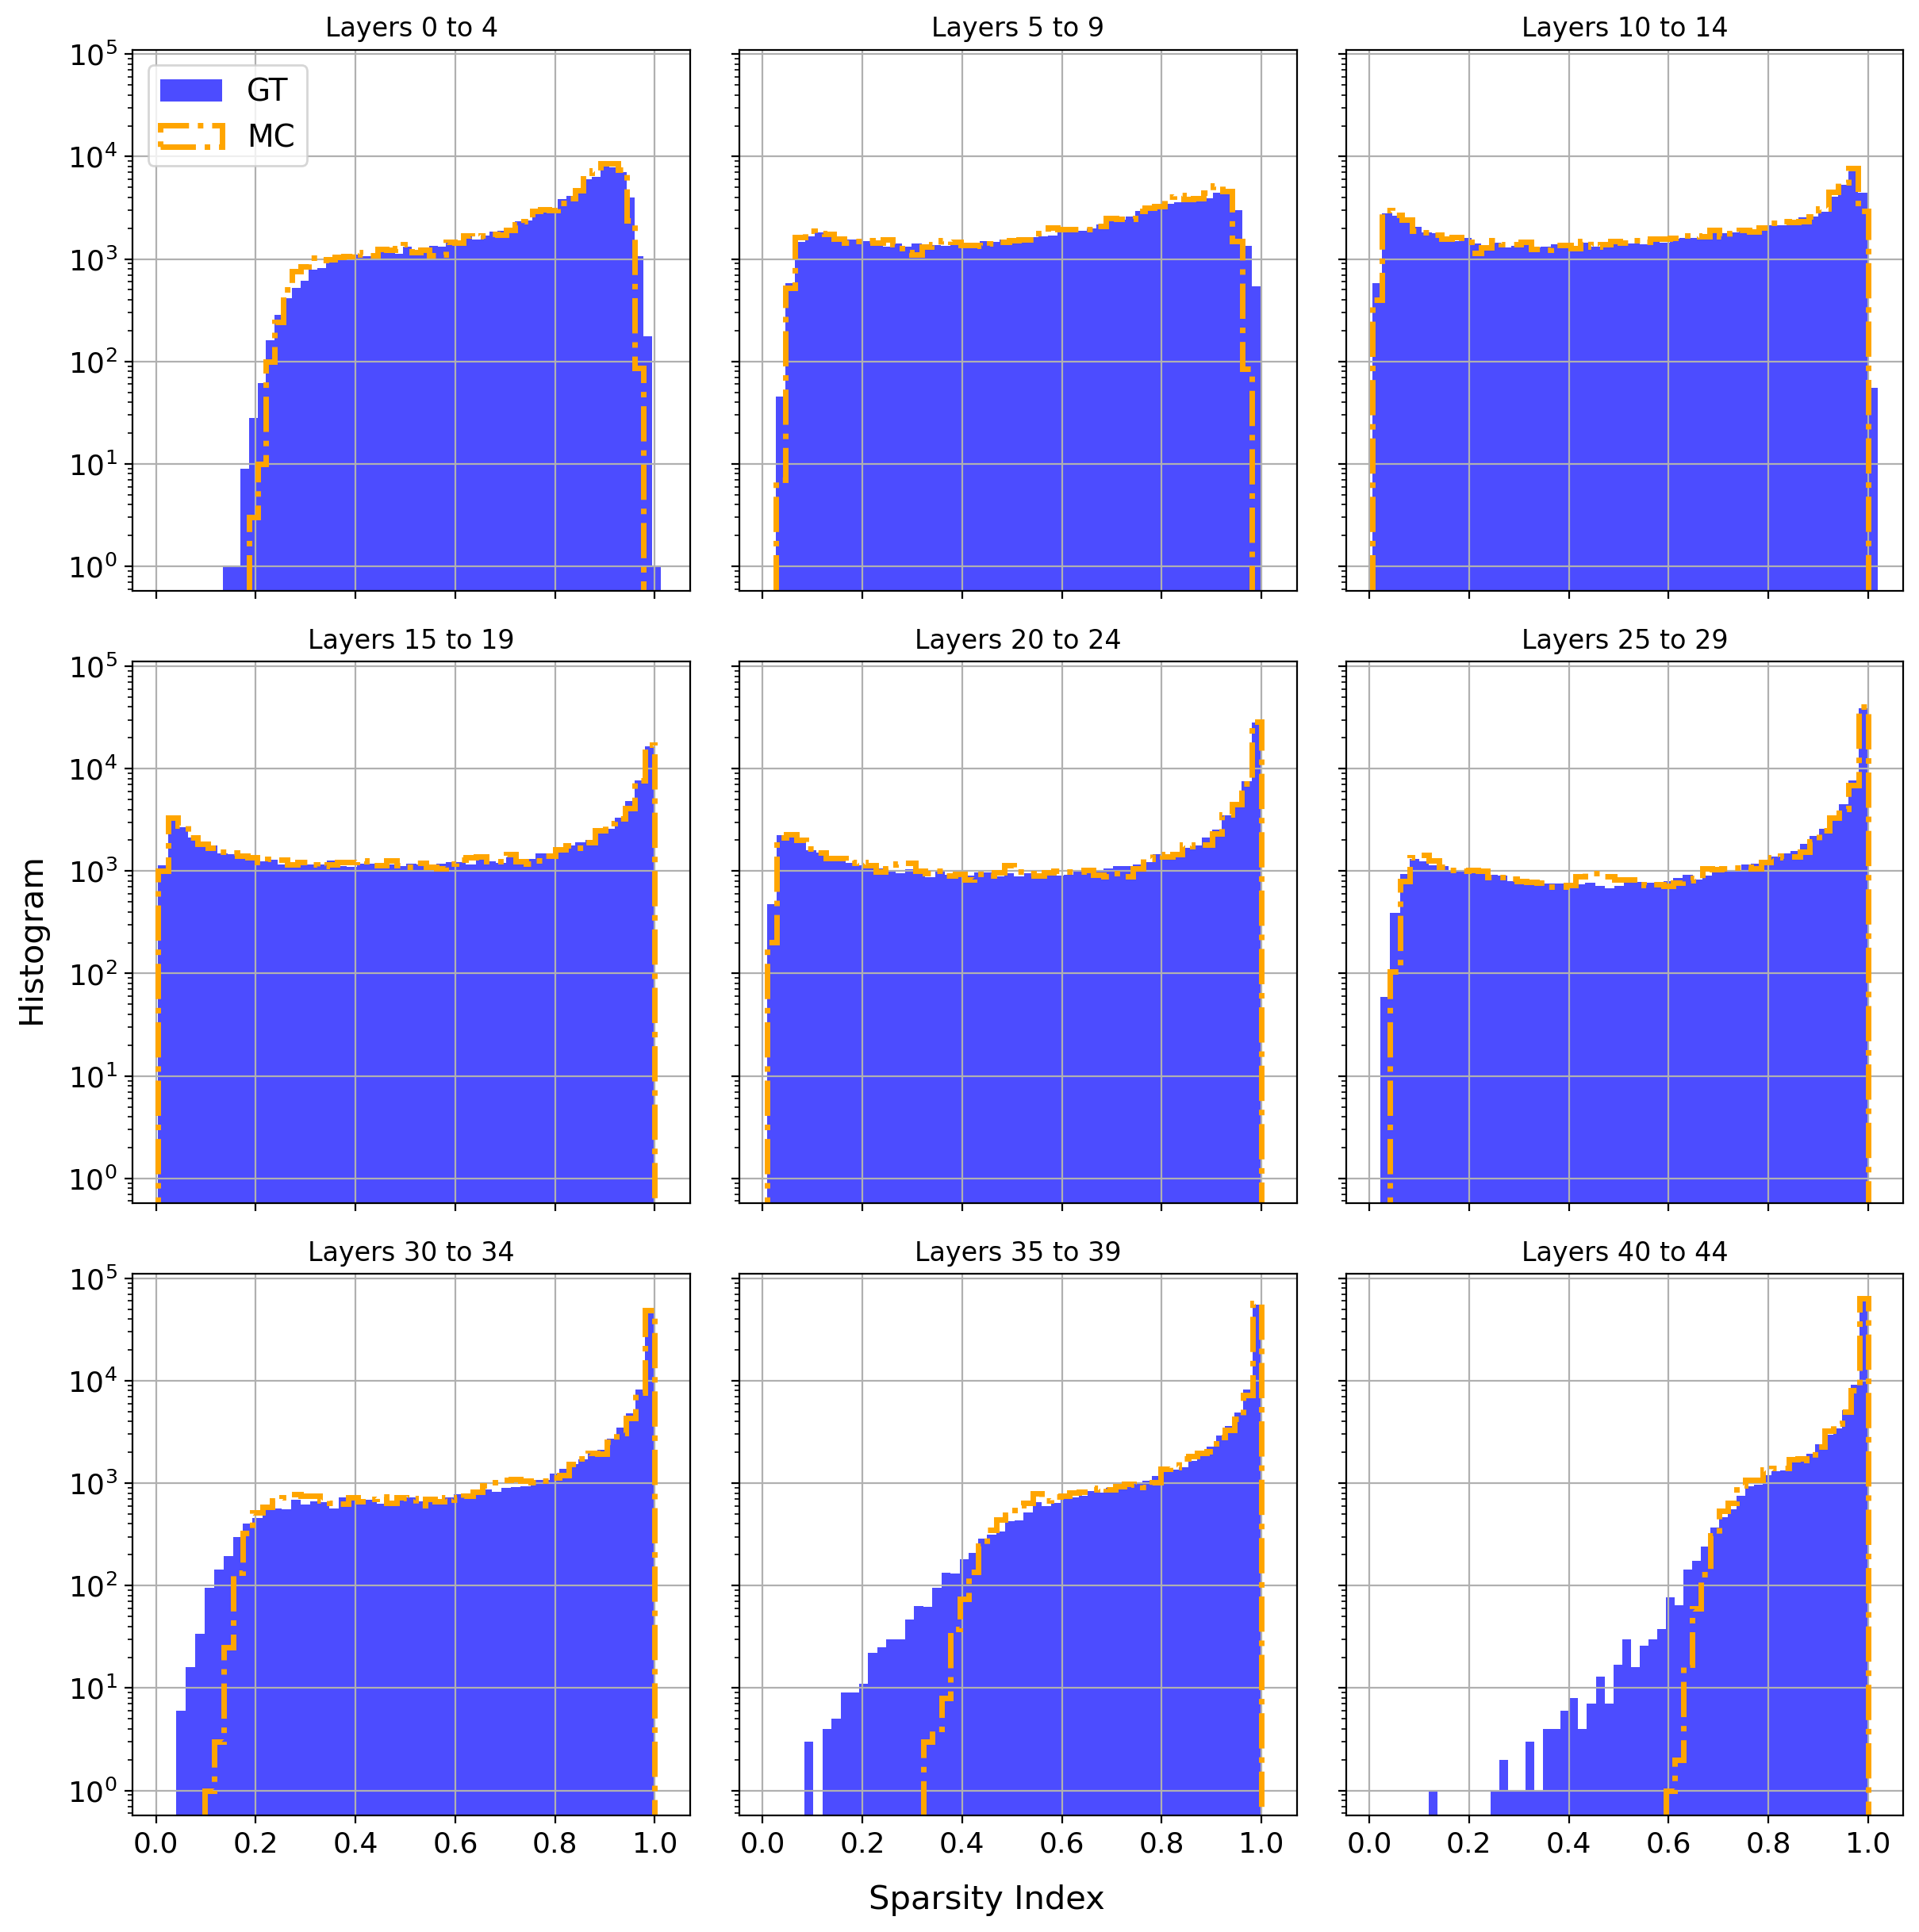

In [80]:
HLF_1_electron.relevantLayers = [0,5,10,15,20,25,30,35,40,45]
plt.figure(figsize=(8,6))
# Create a grid of subplots
fig, axes = plt.subplots(3,3, figsize=(12, 12), sharey=True, sharex=True, tight_layout=True)
fig.text(0.5, -0.01, 'Sparsity Index', ha='center', fontsize=15)
fig.text(-0.01, 0.5, 'Histogram', va='center', rotation='vertical', fontsize=15)

# Iterate through the columns of X and plot histograms
for i,_ in enumerate(HLF_1_electron.relevantLayers[:-1]):
    row_index = i // 3  # Determine the row index
    col_index = i % 3   # Determine the column index
    
    ax = axes[row_index, col_index]  # Get the current subplot
    
    # Plot histogram for the current column
    idx = HLF_1_electron.relevantLayers[i+1]*9*16
    idxPrev = (HLF_1_electron.relevantLayers[i])*9*16
    l = idx - idxPrev
    minVal, maxVal = min(((xtarget_samples[:, idxPrev:idx] == 0).sum(dim=1)/l).numpy()), max(((xtarget_samples[:, idxPrev:idx] == 0).sum(dim=1)/l).numpy())
    binwidth = (maxVal-minVal)/50
    ax.hist(((xtarget_samples[:, idxPrev:idx] == 0).sum(dim=1)/l).numpy(),  bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='stepfilled', linewidth=2.5, color="b", alpha=0.7, label="GT")
    # ax.hist(((xrecon_samples[:, idxPrev:idx] == 0).sum(dim=1)/l).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=2.5, color="c", label="Recon")
    ax.hist(((xgen_samples[:, idxPrev:idx] == 0).sum(dim=1)/l).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=2.5, color="orange", linestyle="dashdot", label="MC")
    # ax.hist(((xgen_samples_qpu[:, idxPrev:idx] == 0).sum(dim=1)/l).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=2.5, color="m", linestyle="dashed", label="QPU")
    if i == 0:
        # ax.legend(["GT", "Recon", "Sample", "Sample w/ QPU"], fontsize=14)
        ax.legend(fontsize=14)
    ax.grid("True")
    
    # Set labels and title for the subplot
    # ax.set_xlabel(f'Column {i + 1}')
    # ax.set_ylabel('Frequency')
    ax.set_title(f'Layers {HLF_1_electron.relevantLayers[i]} to {HLF_1_electron.relevantLayers[i+1]-1}', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()
plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/{modelname}/sparsity_per_layer_{modelname}_test.png')
plt.show()


In [81]:
E_right = 200000
E_left = 1000
tmp = (entarget_samples < E_right) * (entarget_samples > E_left)
idxEnFilter = (tmp == True).nonzero(as_tuple=True)[0]

tmp_gen = (entarget_samples_gen < E_right) * (entarget_samples_gen > E_left)
idxEnFilter_gen = (tmp_gen == True).nonzero(as_tuple=True)[0]

len(idxEnFilter)

76586

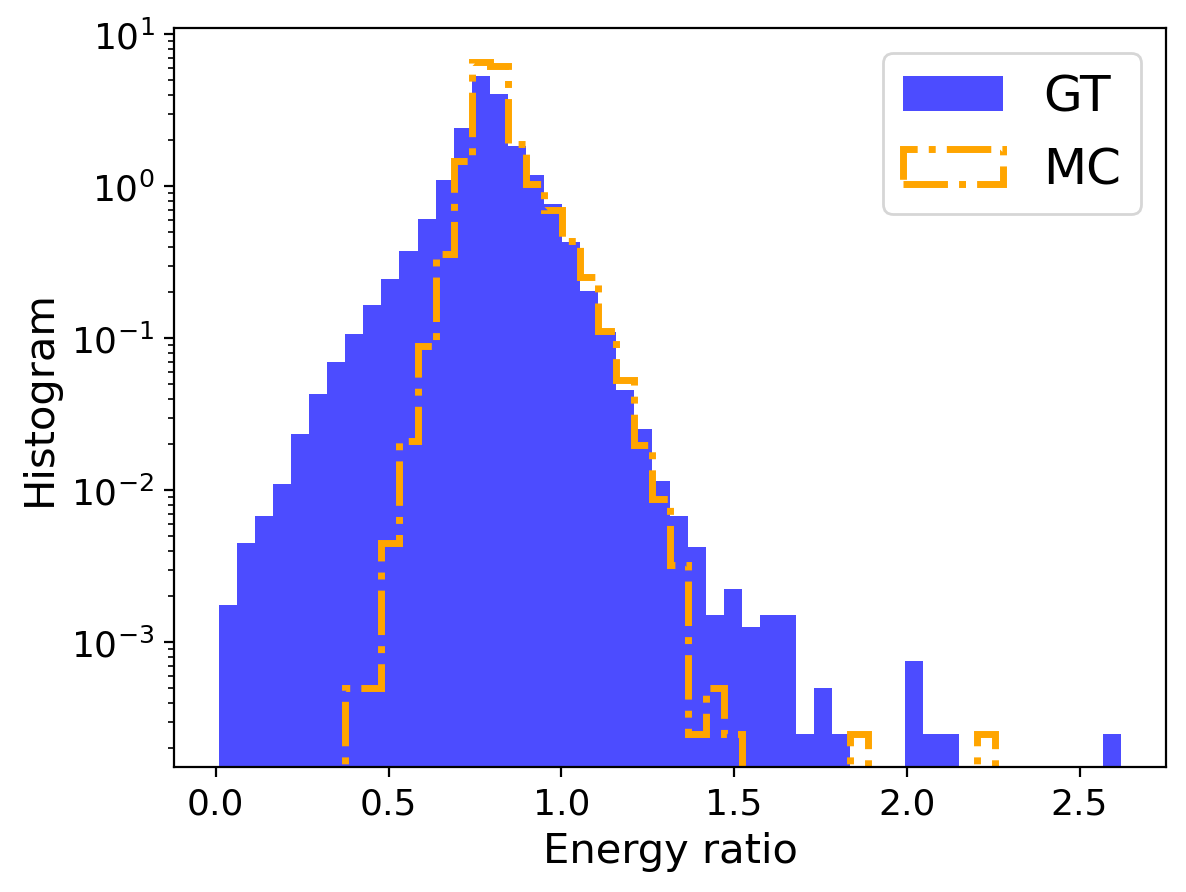

In [82]:
minVal, maxVal = min((xtarget_samples[idxEnFilter,:].sum(dim=1)/entarget_samples[idxEnFilter].view(-1)).numpy()), max((xtarget_samples[idxEnFilter,:].sum(dim=1)/entarget_samples[idxEnFilter].view(-1)).numpy())
binwidth = (maxVal-minVal)/50
plt.hist((xtarget_samples[idxEnFilter,:].sum(dim=1)/entarget_samples[idxEnFilter].view(-1)).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='stepfilled', linewidth=2.5, color="b", alpha=0.7, density=True, label="GT")
plt.hist((xgen_samples[idxEnFilter_gen,:].sum(dim=1).numpy()/entarget_samples_gen[idxEnFilter_gen].view(-1)).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=2.5, color="orange", linestyle="dashdot", density=True, label="MC")
# plt.hist((xgen_samples_qpu[idxEnFilter,:].sum(dim=1)/entarget_samples[idxEnFilter].view(-1)).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=2.5, color="m", linestyle="dashed", density=True, label="QPU")

# minVal, maxVal = min((xtarget_samples.sum(dim=1)/entarget_samples.view(-1)).numpy()), max((xtarget_samples.sum(dim=1)/entarget_samples.view(-1)).numpy())
# binwidth = (maxVal-minVal)/50
# plt.hist((xtarget_samples.sum(dim=1)/entarget_samples.view(-1)).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='stepfilled', linewidth=2.5, color="b", alpha=0.7, density=True, label="GT")
# plt.hist((xgen_samples.sum(dim=1).numpy()/entarget_samples_gen.view(-1)).numpy(), bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=2.5, color="orange", linestyle="dashdot", density=True, label="MC")

plt.xlabel("Energy ratio", fontsize=15)

plt.ylabel("Histogram", fontsize=15)
plt.legend(fontsize=18)
plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/{modelname}/energy_ratio_{modelname}_test.png')
plt.show()


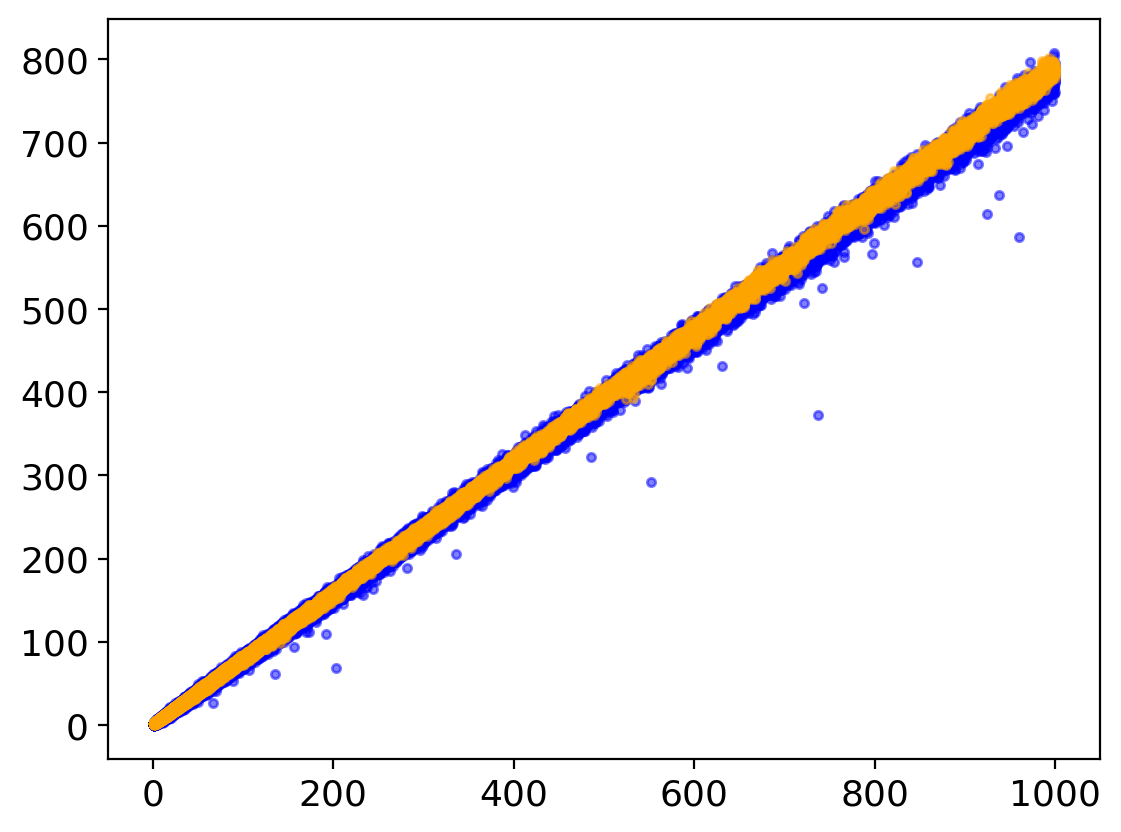

In [83]:
plt.scatter(entarget_samples.numpy()/1000, xtarget_samples.sum(dim=1).numpy()/1000, marker='.', alpha=.5, color="b")
plt.scatter(entarget_samples_gen.numpy()/1000, xgen_samples.sum(dim=1).numpy()/1000, marker='.', alpha=.5, color="orange")

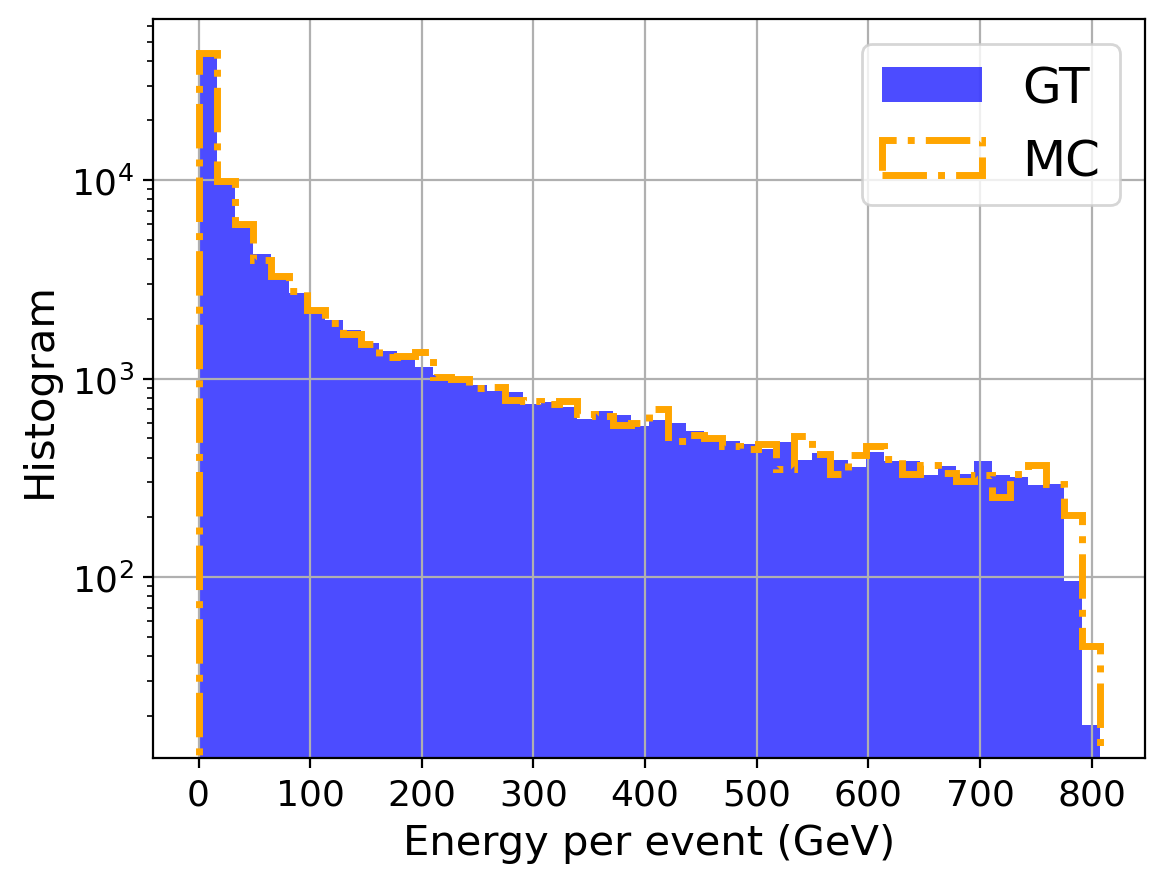

torch.Size([100000, 6480])


In [84]:
minVal, maxVal = min(xtarget_samples.sum(dim=1).numpy()/1000), max(xtarget_samples.sum(dim=1).numpy()/1000)
binwidth = (maxVal-minVal)/50
plt.hist(xtarget_samples.sum(dim=1).numpy()/1000, bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='stepfilled', linewidth=2.5, color="b", alpha=0.7, label="GT")
plt.hist(xgen_samples.sum(dim=1).numpy()/1000, bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', alpha=1.0, linewidth=2.5, color="orange", linestyle="dashdot", label="MC")
plt.xlabel("Energy per event (GeV)", fontsize=15)

plt.ylabel("Histogram", fontsize=15)
plt.legend( fontsize=18)
plt.grid("True")
plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/{modelname}/energy_{modelname}_test.png')
plt.show()
print(xgen_samples.shape)

<Figure size 800x600 with 0 Axes>

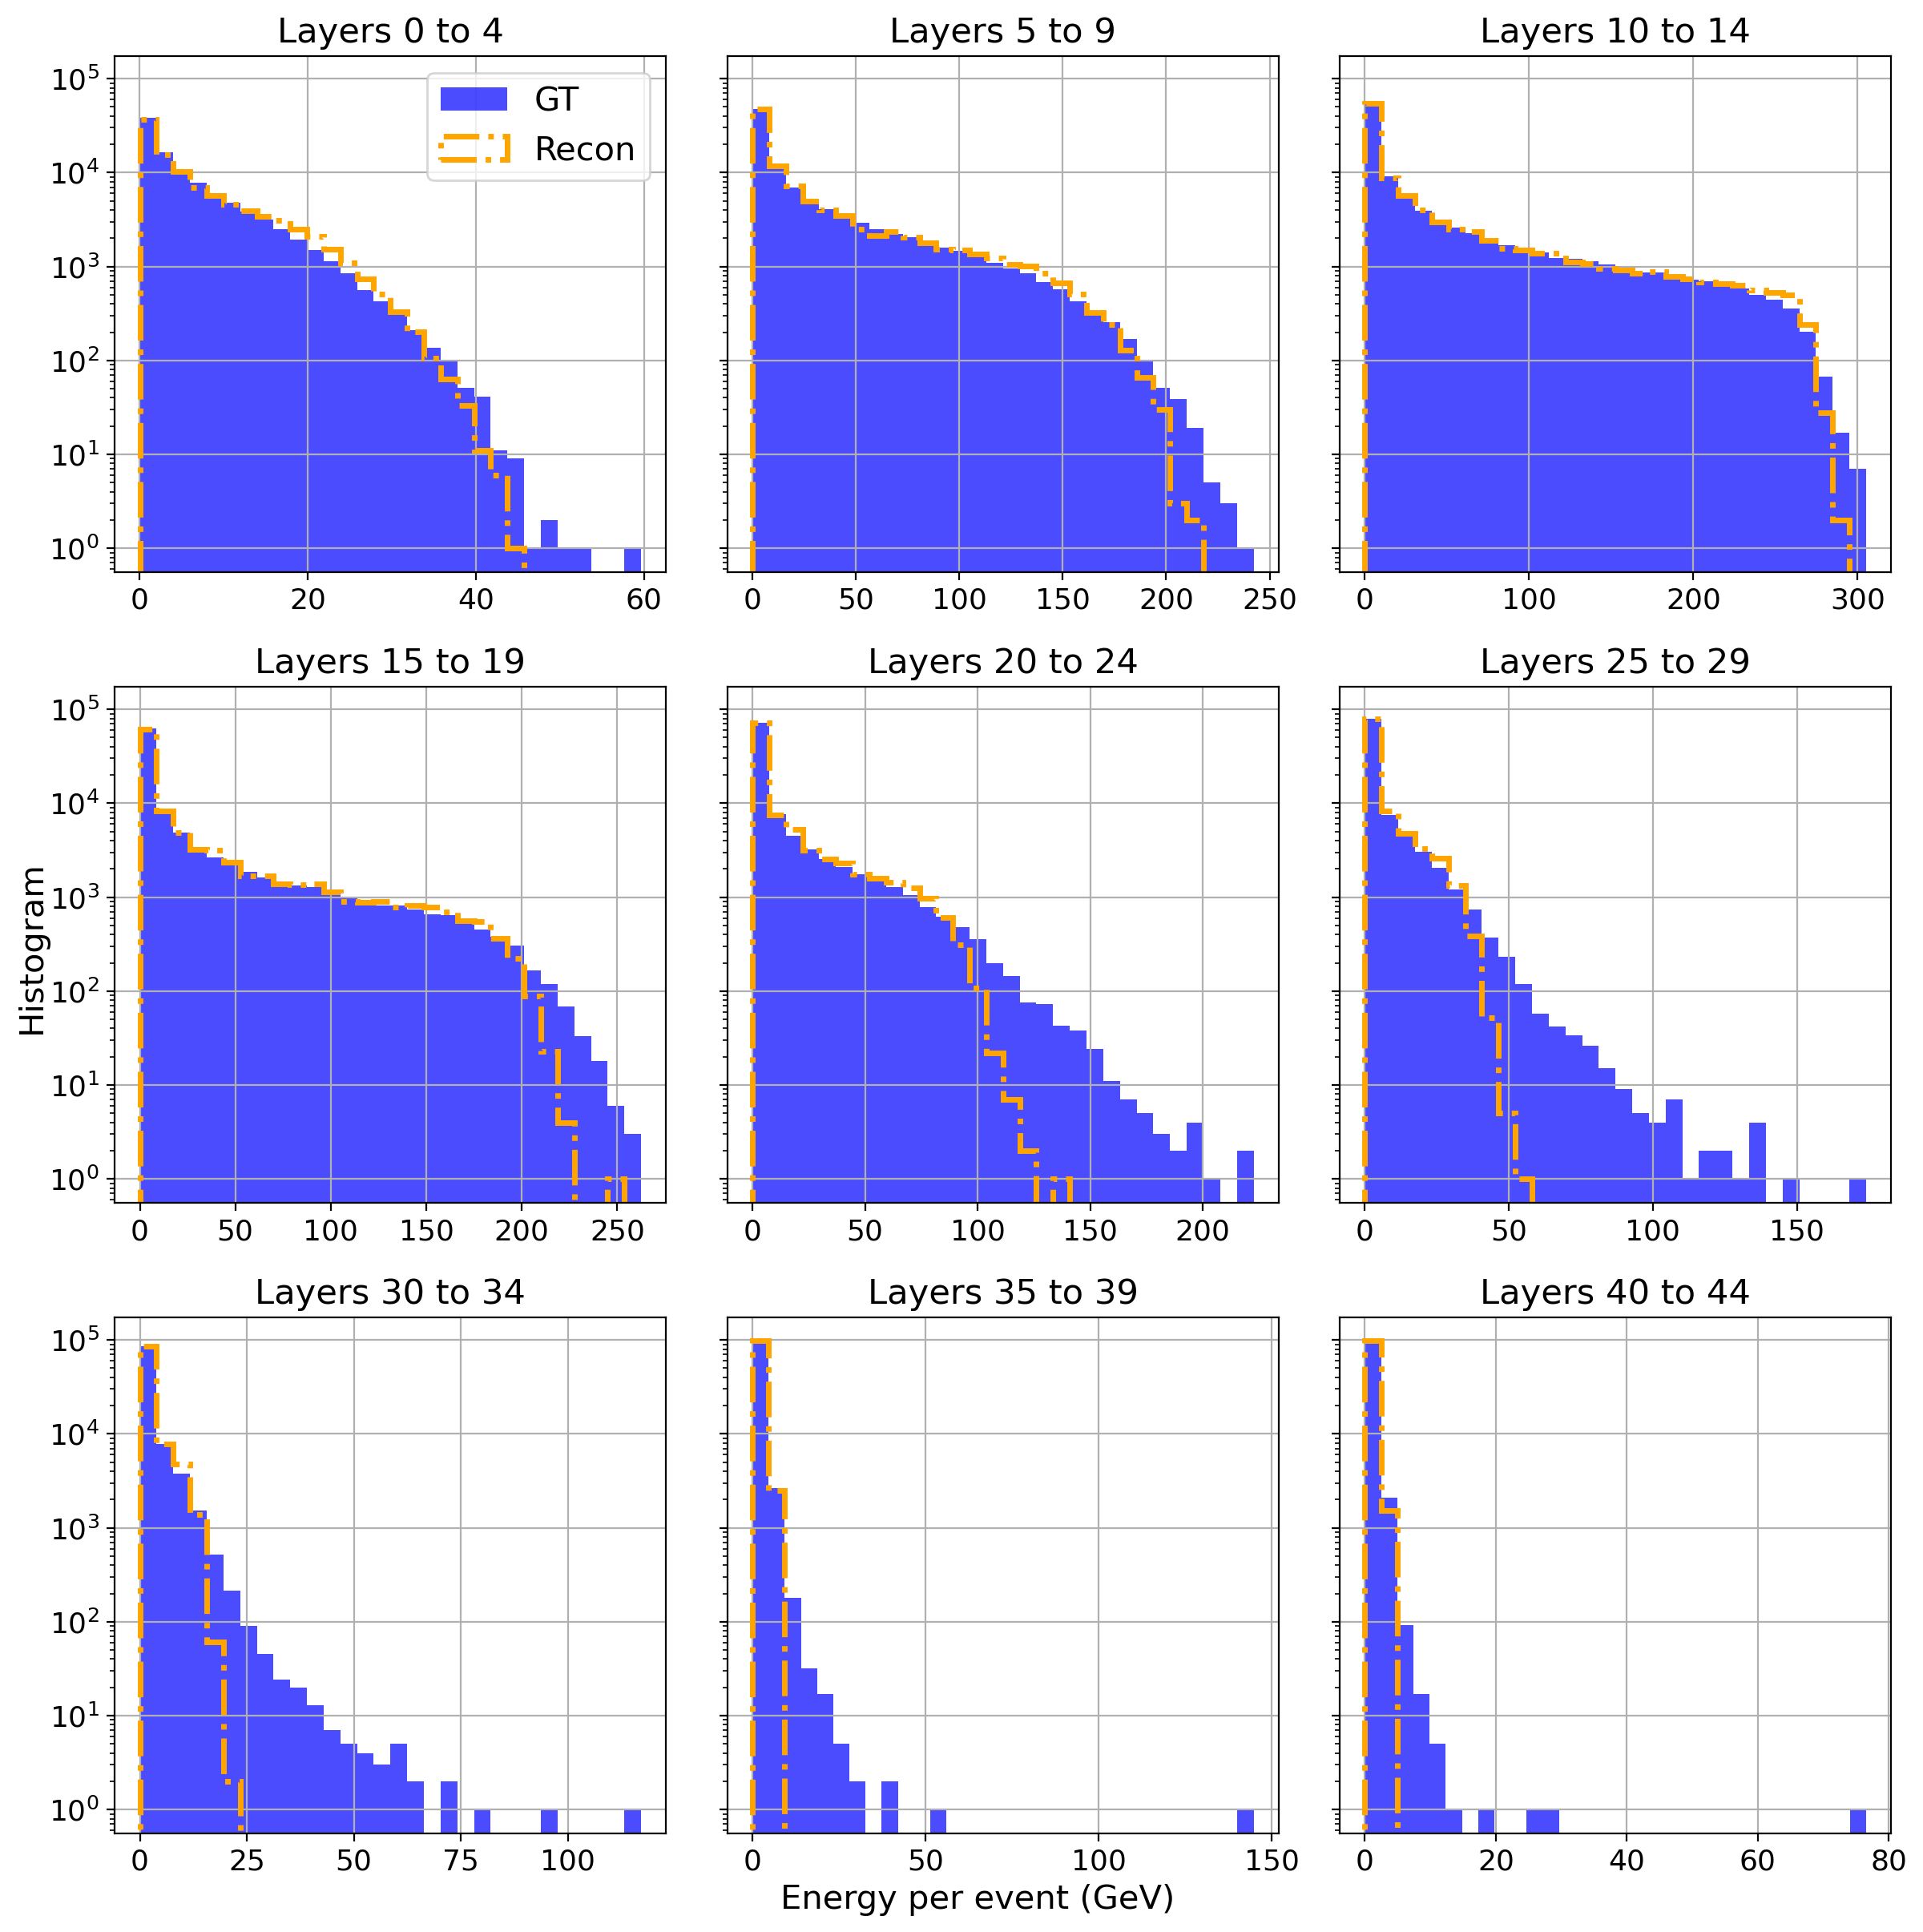

In [85]:
HLF_1_electron.relevantLayers = [0,5,10,15,20,25,30,35,40,45]
plt.figure(figsize=(8,6))
# Create a grid of subplots
fig, axes = plt.subplots(3,3, figsize=(12, 12), sharey=True, sharex=False, tight_layout=True)
fig.text(0.5, 0.0, 'Energy per event (GeV)', ha='center', fontsize=15)
fig.text(0.0, 0.5, 'Histogram', va='center', rotation='vertical', fontsize=15)

# Iterate through the columns of X and plot histograms
for i,_ in enumerate(HLF_1_electron.relevantLayers[:-1]):
    row_index = i // 3  # Determine the row index
    col_index = i % 3   # Determine the column index
    
    ax = axes[row_index, col_index]  # Get the current subplot
    
    # Plot histogram for the current column
    idx = HLF_1_electron.relevantLayers[i+1]*9*16
    idxPrev = (HLF_1_electron.relevantLayers[i])*9*16
    l = idx - idxPrev
    minVal, maxVal = min(xtarget_samples[:, idxPrev:idx].sum(dim=1).numpy()/1000), max(xtarget_samples[:, idxPrev:idx].sum(dim=1).numpy()/1000)
    binwidth = (maxVal-minVal)/30
    ax.hist(xtarget_samples[:, idxPrev:idx].sum(dim=1).numpy()/1000,  bins=np.arange(minVal, maxVal + binwidth, binwidth), density=False, log=True, histtype='stepfilled', linewidth=2.5, color="b", alpha=0.7)
    # ax.hist(xrecon_samples[:, idxPrev:idx].sum(dim=1).numpy()/1000, bins=np.arange(minVal, maxVal + binwidth, binwidth), density=False, log=True, histtype='step', linewidth=2.5, color="c")
    # ax.hist(xrecon_samples_2[:, idxPrev:idx].sum(dim=1).numpy()/1000, bins=20, log=True, histtype='step', linewidth=2.5, color="m", linestyle="dashdot")
    ax.hist(xgen_samples[:, idxPrev:idx].sum(dim=1).numpy()/1000, bins=np.arange(minVal, maxVal + binwidth, binwidth), density=False, log=True, histtype='step', linewidth=2.5, color="orange", linestyle="dashdot")
    # ax.hist(xgen_samples_qpu[:, idxPrev:idx].sum(dim=1).numpy()/1000, bins=np.arange(minVal, maxVal + binwidth, binwidth), log=True, histtype='step', linewidth=2.5, color="m", linestyle="dashed")
    if i == 0:
        # ax.legend(["GT", "Recon", "Sample", "Sample w/ QPU"], title=f'{ds[part]}')
        ax.legend(["GT", "Recon", "Sample", "Sample w/ QPU"], fontsize=15)
    ax.grid("True")
    
    # Set labels and title for the subplot
    # ax.set_xlabel(f'Column {i + 1}')
    # ax.set_ylabel('Frequency')
    ax.set_title(f'Layers {HLF_1_electron.relevantLayers[i]} to {HLF_1_electron.relevantLayers[i+1]-1}')

# Adjust layout and display the plots
plt.tight_layout()
plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/{modelname}/energy_per_layer_{modelname}_test.png')
plt.show()


In [144]:
#JSD
# data.sum(1)
# atlas_data.sum(1)

from scipy.stats import entropy
from numpy.linalg import norm
import numpy as np

def JSD(P, Q):
    _P = P / norm(P, ord=1)
    _Q = Q / norm(Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (entropy(_P, _M) + entropy(_Q, _M))

def bin_data(atlas_data, data, bins=100):
    # bins = 100
    if atlas_data.sum(1).min() < data.sum(1).min() :
        amin = atlas_data.sum(1).min()
    else:
        amin = data.sum(1).min()

    if atlas_data.sum(1).max() < data.sum(1).max() :
        amax = data.sum(1).max()
    else:
        amax = atlas_data.sum(1).max()
    p = np.histogram(data.sum(1), bins, range=(amin,amax))[0]/100000
    q = np.histogram(atlas_data.sum(1), bins, range=(amin,amax))[0]/100000
    return q,p

In [145]:
jsd_list = []
for b in range(1000,200000,5000):
    q,p = bin_data(atlas_data, data, bins=b)
    jsd_list.append(JSD(q,p))

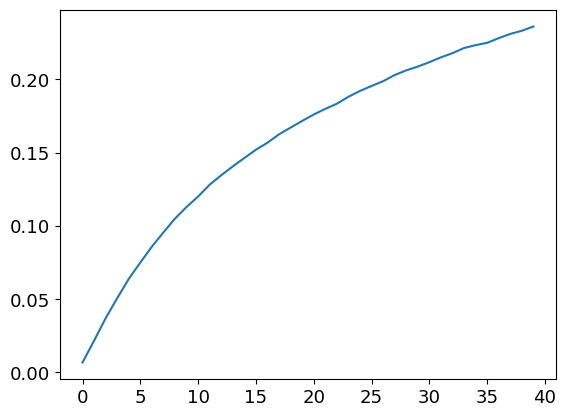

In [146]:
plt.plot(jsd_list)

In [175]:
q,p = bin_data(atlas_data, data, bins=50000)
JSD(q,p)

0.1178401867445305

In [180]:
for b in range(200000,500000,5000):
    q,p = bin_data(atlas_data, data, bins=b)
    jsd_list.append(JSD(q,p))

In [184]:
q1 = np.percentile(atlas_data.sum(1), 25)
q3 = np.percentile(atlas_data.sum(1), 75)
iqr = q3 - q1
print(iqr)

135755.62799044032


In [187]:
# ℎ=2×IQR×𝑛−1/3
h = 2 * iqr * 100000**(-1/3)

In [188]:
(atlas_data.sum(1).max() - atlas_data.sum(1).min())/h

138.09954477473931

In [189]:
q,p = bin_data(atlas_data, data, bins=139)
JSD(q,p)

0.0007290298218439855

In [93]:
###############

In [211]:
part_data = np.load("/home/javier/Projects/CaloQVAE/outputs/2024-08-16/18-37-54/wandb/run-20240818_130637-frfzrs9j/files/PartitionData.npz")
jet_data = np.load("/home/javier/Projects/CaloQVAE/outputs/2024-08-16/18-37-54/wandb/run-20240818_130637-frfzrs9j/files/JetData.npz")

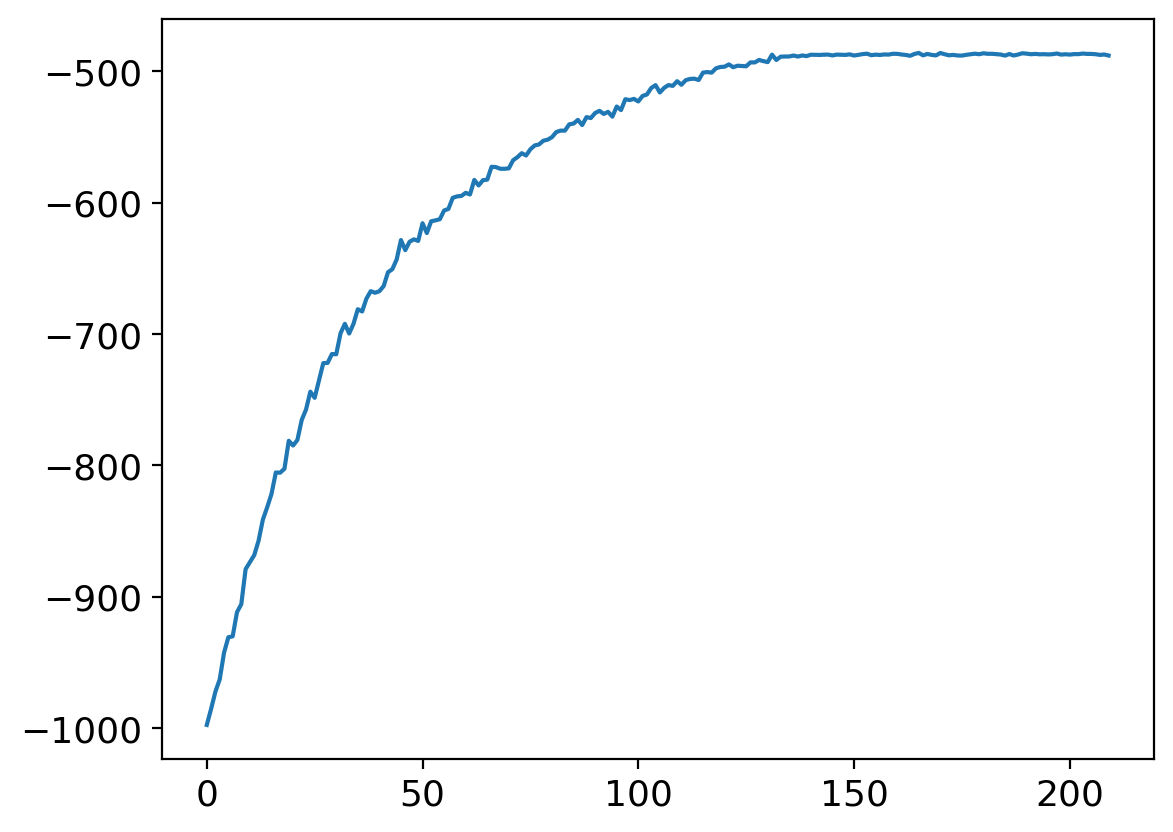

In [212]:
# plt.plot(part_data['array1'])
plt.plot(np.concatenate((part_data['array3'][:70], part_data['array3'][78:140], part_data['array3'][148:])) 
         - np.concatenate((part_data['array1'][:70], part_data['array1'][78:140], part_data['array1'][148:])))

In [147]:
# plt.plot(jet_data['array1'], jet_data['array5'])
np.concatenate((jet_data['array1'][:7], jet_data['array1'][7:14] - 8, jet_data['array1'][14:] - 8-8))

array([ 10,  20,  30,  40,  50,  60,  70,  72,  82,  92, 102, 112, 122,
       132, 134, 144, 154, 164, 174, 184, 194, 204])

In [205]:
1e-2

0.01

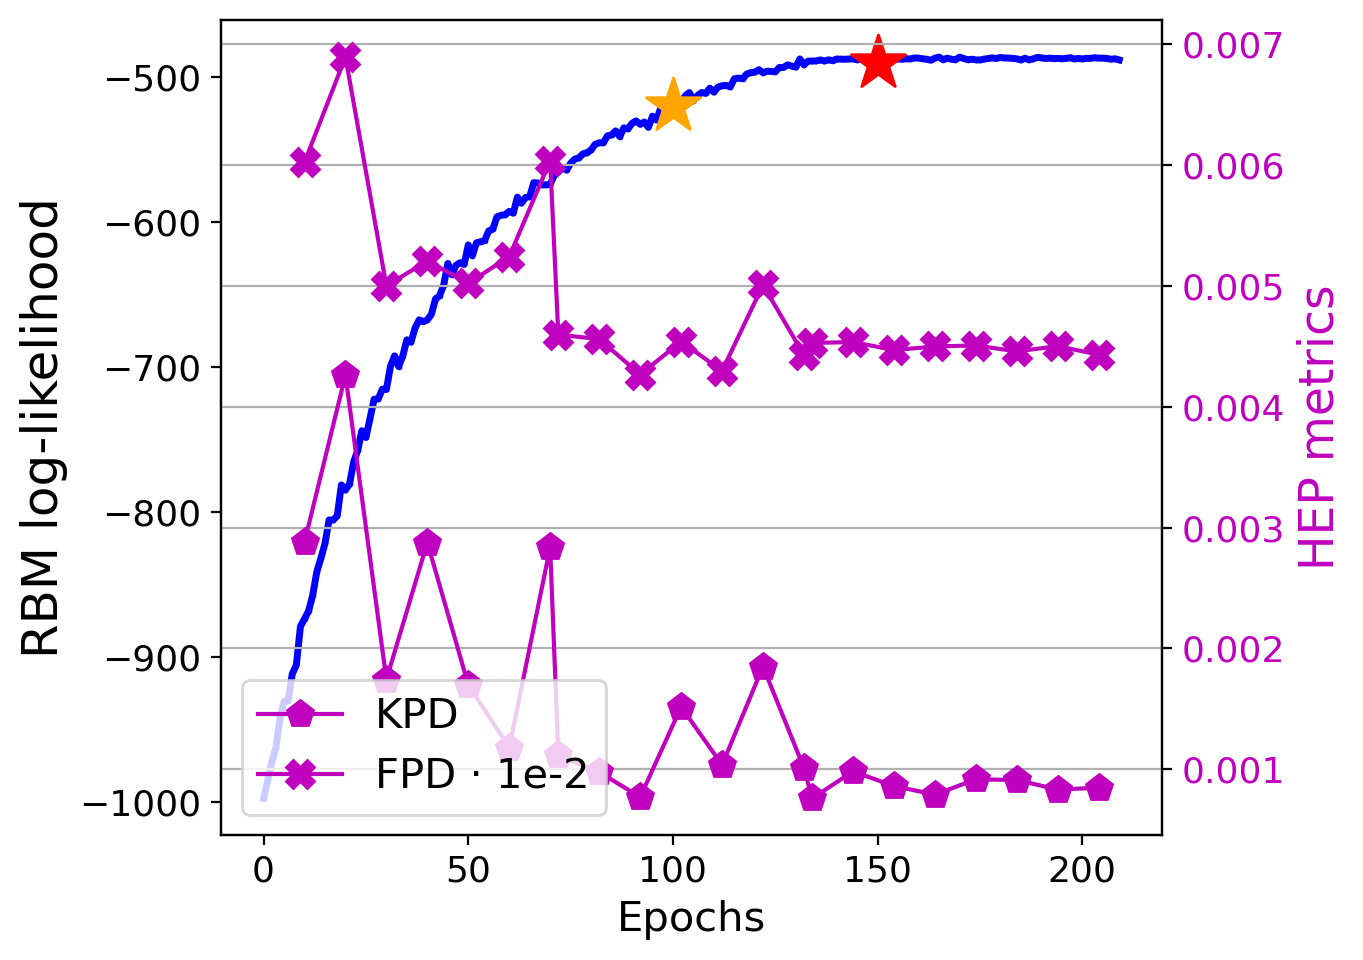

In [213]:
fig, ax1 = plt.subplots(figsize=(7, 5)) 

ax1.plot(np.concatenate((part_data['array3'][:70], part_data['array3'][78:140], part_data['array3'][148:])) 
         - np.concatenate((part_data['array1'][:70], part_data['array1'][78:140], part_data['array1'][148:])), marker='o', markersize=1, linewidth=2.5, c='blue' )
ax1.scatter([100], [-520], s=420, marker='*', color='orange', zorder=2)
ax1.scatter([150], [-490], s=420, marker='*', color='r', zorder=2)

ax1.set_xlabel("Epochs", fontsize=15)
ax1.set_ylabel("RBM log-likelihood", fontsize=18)
# ax2.legend(["KPD","FPD (·10^(-2))","4"], fontsize=15, loc='upper left')
# ax1.grid("True")

# # Adding Twin Axes to plot using dataset_2
ax2 = ax1.twinx() 
color = 'm' #'tab:green'
ax2.plot(np.concatenate((jet_data['array1'][:7], jet_data['array1'][7:14] - 8, jet_data['array1'][14:] - 8-8)), 
         jet_data['array5'], marker='p', markersize=10, linewidth=1.5, color = color)
ax2.plot(np.concatenate((jet_data['array1'][:7], jet_data['array1'][7:14] - 8, jet_data['array1'][14:] - 8-8)), 
         jet_data['array4']*10**(-2), marker='X', markersize=10, linewidth=1.5, color = color)
ax2.tick_params(axis ='y', labelcolor = color) 
ax2.legend(["KPD","FPD · 1e-2","4"], fontsize=15, loc='lower left')
ax2.set_ylabel("HEP metrics", fontsize=17, color = color)
# ax2.axhline([0.0001], color='black', linestyle='dashed', linewidth=1)
# ax2.axhline([0.0001], color='black', linestyle='dashed', linewidth=1)
ax2.grid("True")
plt.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.9)
plt.tight_layout()

# plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/LL_KPD_FPD.png')

# Show plot 
plt.show()

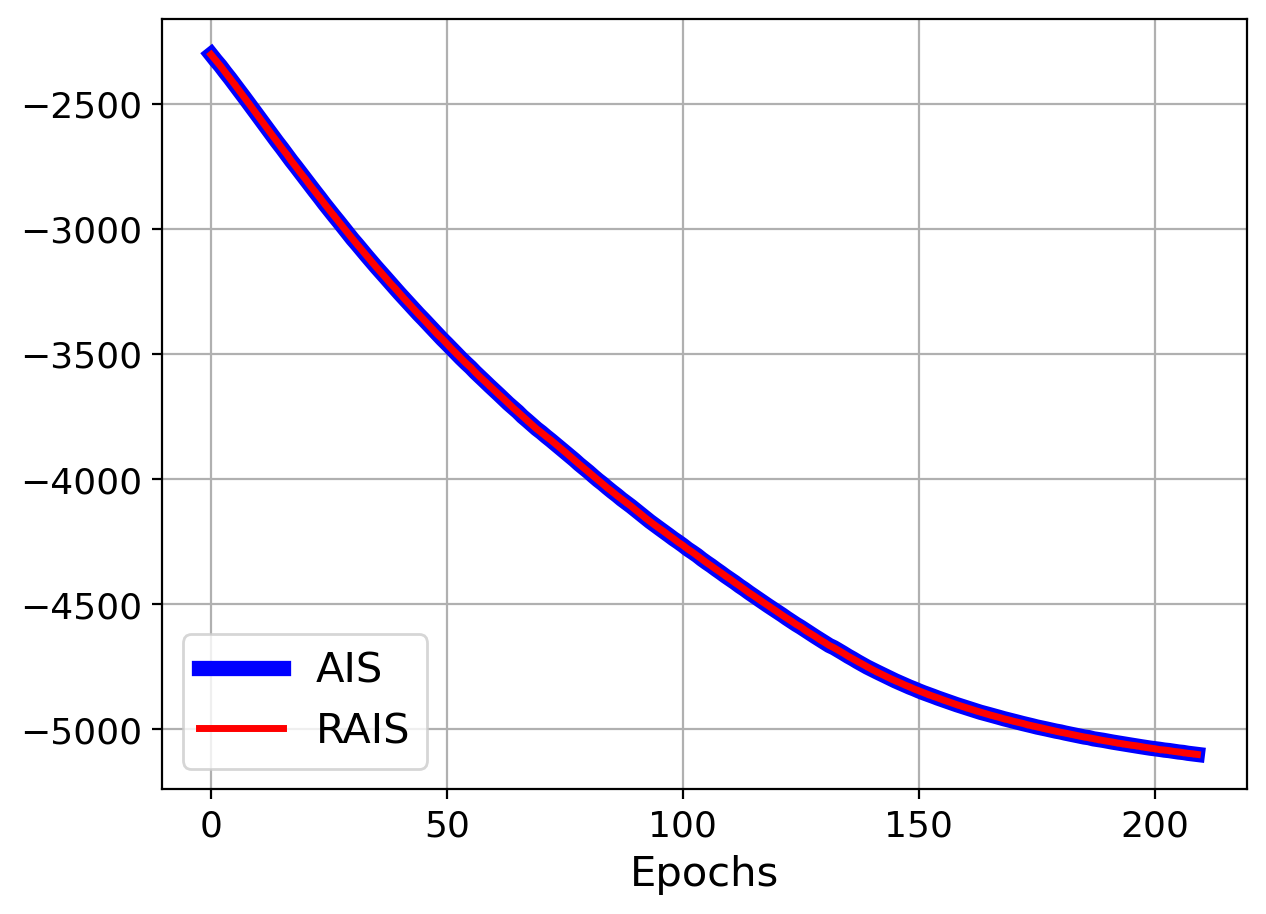

In [204]:
fig, ax1 = plt.subplots(figsize=(7, 5)) 
# (part_data['array3'][:70], part_data['array3'][78:140], part_data['array3'][148:])) 
ax1.plot(- np.concatenate((part_data['array1'][:70], part_data['array1'][78:140], part_data['array1'][148:])), 
          marker='o', markersize=1, linewidth=5.5, c='blue' )
ax1.plot(- np.concatenate((part_data['array2'][:70], part_data['array2'][78:140], part_data['array2'][148:])), 
          marker='o', markersize=1, linewidth=2.5, c='red' )

ax1.set_xlabel("Epochs", fontsize=15)
# ax1.set_ylabel("RBM log-likelihood", fontsize=18)
ax1.legend(["AIS","RAIS","4"], fontsize=15, loc='lower left')
ax1.grid("True")
plt.savefig(f'/home/javier/Projects/CaloQVAE/figs/AIS_RAIS.png')

In [108]:
from utils.plotting.HEP_metric_per_epoch import create_filenames_dict as create_filenames_dict_mod
from utils.stats.partition import create_filenames_dict
create_filenames_dict #(run_path, data="caloqvae")

<function utils.stats.partition.create_filenames_dict(run_path, data='caloqvae')>

In [112]:
run_path = "/home/javier/Projects/CaloQVAE/outputs/2024-08-16/18-37-54/wandb/run-20240818_130637-frfzrs9j/files/AtlasConditionalQVAE3D_atlas_default_140.pth"
fn = create_filenames_dict(run_path, data="");
fn_mod = create_filenames_dict_mod(run_path, data="");

[16:59:48.157] WARN   utils.stats.partition                             Directory /home/javier/Projects/CaloQVAE/outputs/2024-08-16/18-37-54/wandb/run-20240828_190445-frfzrs9j/files/RBM/ might not exist.
[16:59:48.157] WARN   utils.stats.partition                             Directory /home/javier/Projects/CaloQVAE/outputs/2024-08-16/18-37-54/wandb/run-20240827_165834-frfzrs9j/files/RBM/ might not exist.
[16:59:48.157] WARN   utils.stats.partition                             Directory /home/javier/Projects/CaloQVAE/outputs/2024-08-16/18-37-54/wandb/run-20240827_173718-frfzrs9j/files/RBM/ might not exist.
[16:59:48.158] WARN   utils.stats.partition                             Directory /home/javier/Projects/CaloQVAE/outputs/2024-08-16/18-37-54/wandb/run-20240827_164931-frfzrs9j/files/RBM/ might not exist.
[16:59:48.158] WARN   utils.stats.partition                             Directory /home/javier/Projects/CaloQVAE/outputs/2024-08-16/18-37-54/wandb/run-20240828_130614-frfzrs9j/files/RB

In [114]:
print(fn_mod.keys())
fn_mod

dict_keys(['run-20240826_133632-frfzrs9j', 'run-20240816_183755-frfzrs9j', 'run-20240818_130637-frfzrs9j', 'size', 'prefix'])


{'run-20240826_133632-frfzrs9j': ['AtlasConditionalQVAE3D_atlas_default_150.pth',
  'AtlasConditionalQVAE3D_atlas_default_160.pth',
  'AtlasConditionalQVAE3D_atlas_default_170.pth',
  'AtlasConditionalQVAE3D_atlas_default_180.pth',
  'AtlasConditionalQVAE3D_atlas_default_190.pth',
  'AtlasConditionalQVAE3D_atlas_default_200.pth',
  'AtlasConditionalQVAE3D_atlas_default_210.pth',
  'AtlasConditionalQVAE3D_atlas_default_220.pth'],
 'run-20240816_183755-frfzrs9j': ['AtlasConditionalQVAE3D_atlas_default_10.pth',
  'AtlasConditionalQVAE3D_atlas_default_20.pth',
  'AtlasConditionalQVAE3D_atlas_default_30.pth',
  'AtlasConditionalQVAE3D_atlas_default_40.pth',
  'AtlasConditionalQVAE3D_atlas_default_50.pth',
  'AtlasConditionalQVAE3D_atlas_default_60.pth',
  'AtlasConditionalQVAE3D_atlas_default_70.pth'],
 'run-20240818_130637-frfzrs9j': ['AtlasConditionalQVAE3D_atlas_default_100.pth',
  'AtlasConditionalQVAE3D_atlas_default_110.pth',
  'AtlasConditionalQVAE3D_atlas_default_120.pth',
  'AtlasC

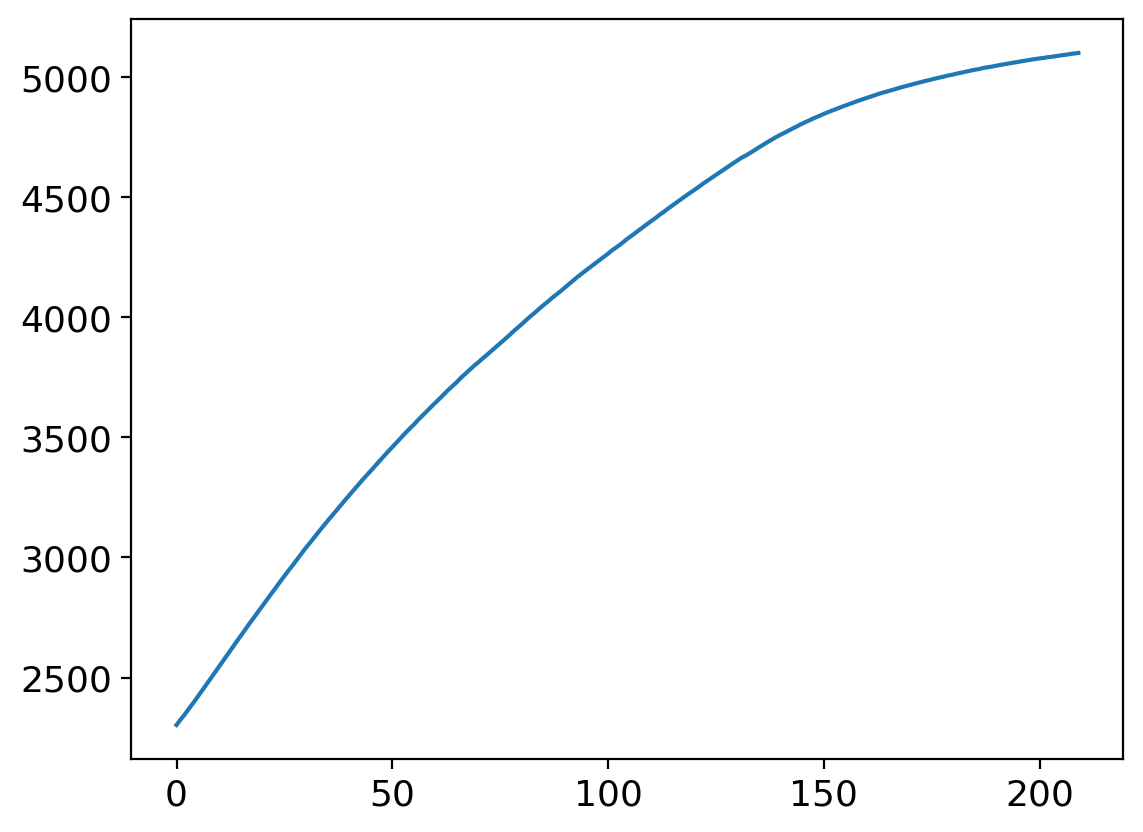

In [124]:
plt.plot(np.concatenate((part_data['array1'][:70], part_data['array1'][78:140], part_data['array1'][148:])))
# fn['run-20240826_133632-frfzrs9j']

In [120]:
part_data['array1'][:70]

array([2302.40722656, 2326.1953125 , 2348.38818359, 2373.47460938,
       2397.18652344, 2422.56738281, 2447.51220703, 2472.52148438,
       2498.30932617, 2523.63427734, 2549.2487793 , 2574.79248047,
       2600.30908203, 2626.28393555, 2651.84277344, 2676.19580078,
       2701.99707031, 2727.24926758, 2751.21069336, 2775.98779297,
       2800.84619141, 2825.97119141, 2850.00683594, 2874.08300781,
       2899.02075195, 2922.86865234, 2946.46777344, 2969.60766602,
       2993.69921875, 3017.18554688, 3041.02783203, 3062.79785156,
       3085.53857422, 3108.06738281, 3130.25292969, 3152.25854492,
       3173.38232422, 3194.70605469, 3216.45849609, 3237.66186523,
       3258.91601562, 3279.46679688, 3300.65576172, 3321.14868164,
       3341.29663086, 3360.65136719, 3380.88354492, 3400.640625  ,
       3421.71289062, 3441.01318359, 3459.7265625 , 3479.1887207 ,
       3498.7253418 , 3517.77709961, 3536.05712891, 3553.61425781,
       3573.14697266, 3590.85644531, 3609.        , 3627.17675

In [12]:
##################Corr
import torch

In [64]:
def self_correlation(arr, t,τ):
    μ = arr.mean(dim=0)
    C = (arr[:,t+τ]*arr[:,t]).mean(dim=0) - μ[t+τ]*μ[t]
    return C/(arr.var(dim=0)[t])

def c_i_tau(p1T,τ,Δt=1):
    C1 = self_correlation(p1T,0,τ)
    C1T = torch.tensor([C1]).unsqueeze(1)
    for t in range(Δt,steps+1-τ,Δt):
        # print(t)
        C1 = self_correlation(p1T,t,τ)
        C1T = torch.cat((C1T, torch.tensor([C1]).unsqueeze(1)),dim=1)
    C1m = C1T.mean(dim=1)
    return C1m

In [53]:
arr = torch.tensor(np.array(atlas_["showers"]))
_en = torch.tensor(np.array(atlas_["incident_energies"]))

In [68]:
E_right = 1500
E_left = 1000
tmp = (_en < E_right) * (_en > E_left)
idxEnFilter = (tmp == True).nonzero(as_tuple=True)[0]
len(idxEnFilter)

5765

In [48]:
# steps=1000
# a = c_i_tau(arr[:10000,:1001],1)
# torch.tensor(a)

8
17
26
35
44
53
62
71
80
89
98
107
116
125
134
143
152
161
170
179
188
197
206
215
224
233
242
251
260
269
278
287
296
305
314
323
332
341
350
359
368
377
386
395
404
413
422
431
440
449
458
467
476
485
494
503
512
521
530
539
548
557
566
575
584
593
602
611
620
629
638
647
656
665
674
683
692
701
710
719
728
737
746
755
764
773
782
791
800
809
818
827
836
845
854
863
872
881
890
899
908
917
926
935
944
953
962
971
980
989
998
1007
1016
1025
1034
1043
1052
1061
1070
1079
1088
1097
1106
1115
1124
1133
1142
1151
1160
1169
1178
1187
1196
1205
1214
1223
1232
1241
1250
1259
1268
1277
1286
1295
1304
1313
1322
1331
1340
1349
1358
1367
1376
1385
1394
1403
1412
1421
1430
1439
1448
1457
1466
1475
1484
1493
1502
1511
1520
1529
1538
1547
1556
1565
1574
1583
1592
1601
1610
1619
1628
1637
1646
1655
1664
1673
1682
1691
1700
1709
1718
1727
1736
1745
1754
1763
1772
1781
1790
1799
1808
1817
1826
1835
1844
1853
1862
1871
1880
1889
1898
1907
1916
1925
1934
1943
1952
1961
1970
1979
1988
1997
2006
2015
202

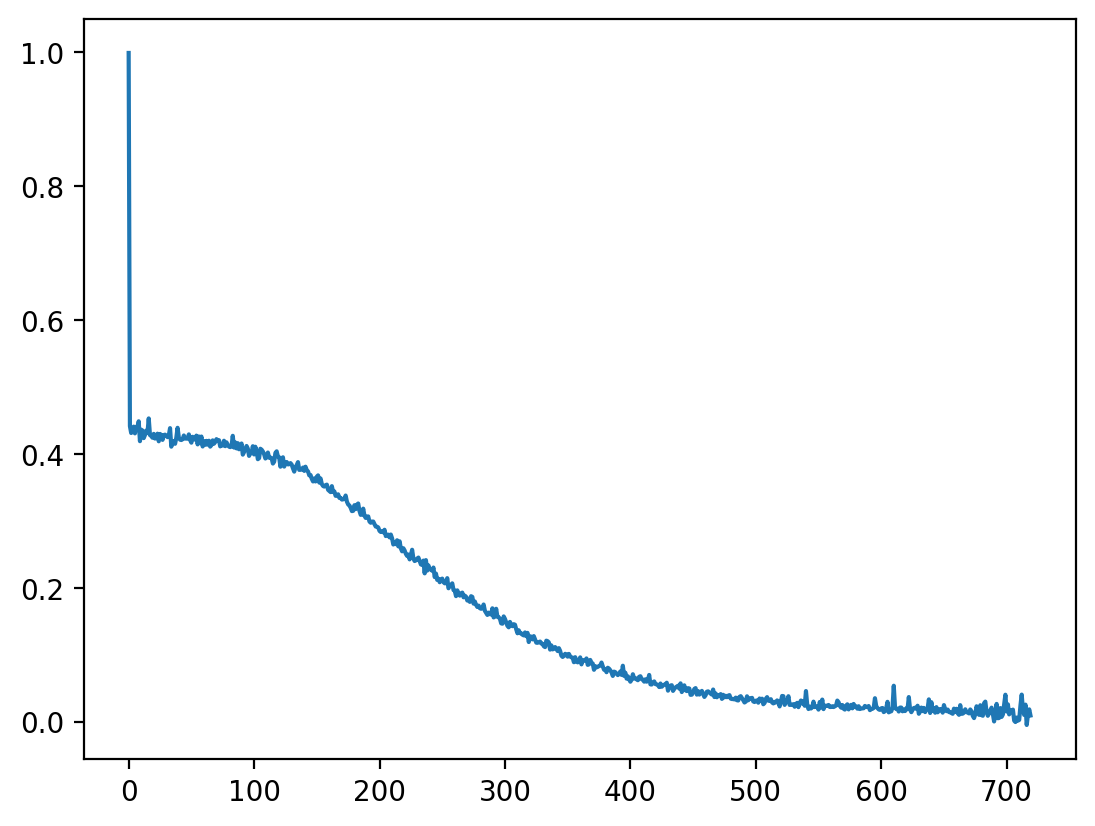

In [82]:
# Δt=500
# steps=6480-1
# ar = arr[idxEnFilter,:6480]
Δt=25
steps=6480-1
ar = arr[:1000,:6480]

C1m = c_i_tau(ar,0,Δt)
C1 = C1m.unsqueeze(1)
for τ in range(8,steps,9):
    print(τ)
    C1m = c_i_tau(ar,τ,Δt)
    C1 = torch.cat((C1,C1m.unsqueeze(1)),dim=1)
C1 = C1.cpu()
plt.plot(C1.permute(1,0))
plt.show()

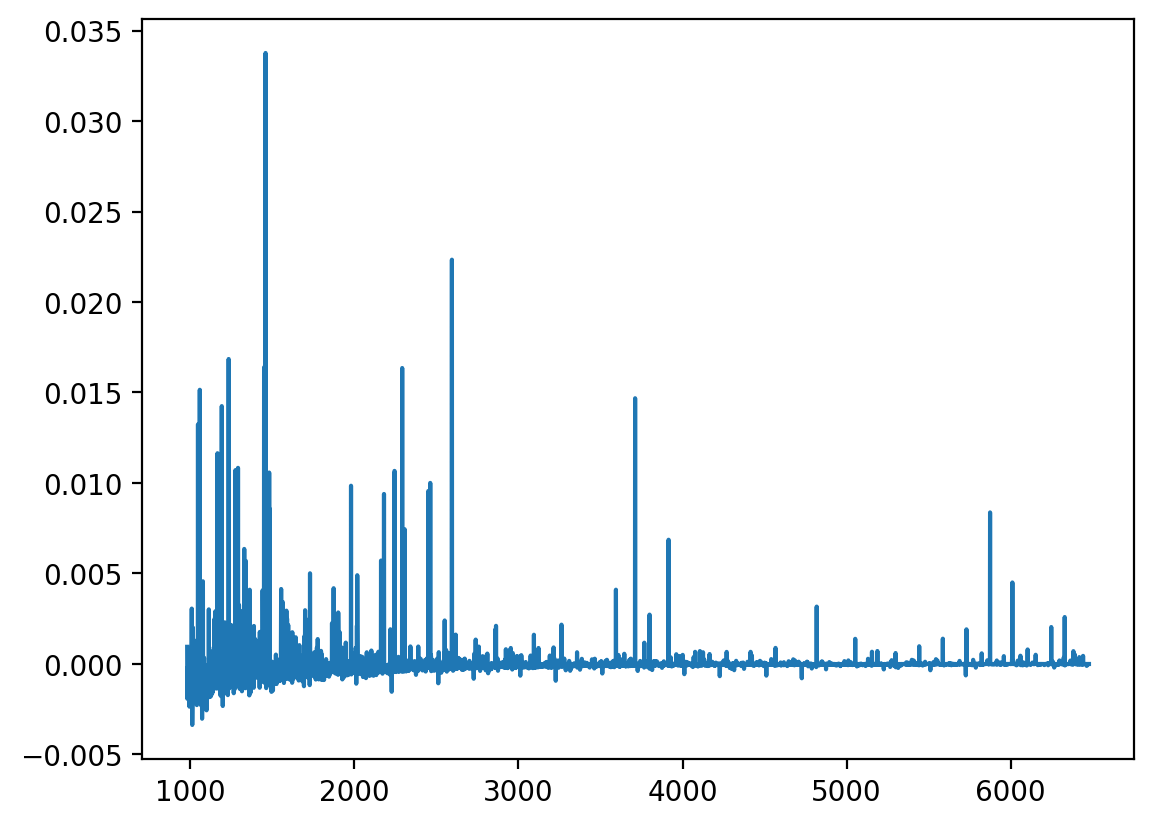

In [72]:
plt.plot(C1.permute(1,0))
plt.show()